
# Análisis Exploratorio de Datos - TP1

**Dataset elegido:** Precios Claros - Base SEPA

En esta notebook realizamos un análisis exploratorio completo del dataset de productos ofrecidos por cadenas de supermercados, con el objetivo de:

- Comprender la estructura y calidad de los datos
- Visualizar patrones relevantes
- Plantear un problema supervisado de machine learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.ticker as mticker

In [2]:
import sys
print(sys.executable)


c:\Users\nahue\Documents\Ceia\Analisis de Datos\venv\Scripts\python.exe


In [3]:
sucursales = pd.read_csv('sucursales.csv', sep="|", encoding="utf-8", dtype=str)
sucursales

,id_comercio,id_bandera,id_sucursal,sucursales_nombre,sucursales_tipo,sucursales_calle,sucursales_numero,sucursales_latitud,sucursales_longitud,sucursales_observaciones,...,sucursales_codigo_postal,sucursales_localidad,sucursales_provincia,sucursales_lunes_horario_atencion,sucursales_martes_horario_atencion,sucursales_miercoles_horario_atencion,sucursales_jueves_horario_atencion,sucursales_viernes_horario_atencion,sucursales_sabado_horario_atencion,sucursales_domingo_horario_atencion
0,10,3,365,Nazca 1944,Autoservicio,Nazca,1944,-34.612145,-58.480997,NaN,...,1416,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,10:30 a 20:00
1,10,3,408,Perú 916,Autoservicio,Perú,916,-34.618745,-58.374322,NaN,...,1068,Ciudad Autónoma de Buenos Aires,AR-C,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,11:00 a 20:00
2,10,2,144,La Plata II,Supermercado,Calle 12,1200,-34.923011,-57.949931,NaN,...,1900,La Plata,AR-B,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,09:00 a 20:00
3,10,3,755,C.Tribulato 1279 (San Miguel),Autoservicio,C Tribulato,1279,-34.541507,-58.713798,NaN,...,1663,San Miguel,AR-B,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,09:00 A 20:00
4,10,3,479,Avenida Eva Perón 4215,Autoservicio,Avenida Eva Perón,4215,-34.690047,-58.689142,NaN,...,1722,Merlo,AR-B,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,07:30 a 20:00,10:00 a 19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,10,2,296,Olavarría II,Supermercado,Av. del Valle,4379,-36.908071,-60.314098,NaN,...,7400,Olavarría,AR-B,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,09:00 a 20:00
564,10,3,196,Corrientes 3651,Supermercado,Av. Corrientes,3651,-34.603633,-58.416192,NaN,...,1046,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,11:00 a 20:00
565,10,3,791,BEIRO 3342,Autoservicio,BEIRO,3345,-34.598084,-58.500119,NaN,...,1419,Ciudad Autónoma de Buenos Aires,AR-C,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,11:00 A 20:00
566,10,2,168,Jujuy II,Supermercado,Av. 19 de Abril,779,-24.188920,-65.303701,NaN,...,4600,Jujuy,AR-Y,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:30 a 14:00


In [4]:
comercio = pd.read_csv('comercio.csv', sep="|", encoding="utf-8", dtype=str)
comercio

,id_comercio,id_bandera,comercio_cuit,comercio_razon_social,comercio_bandera_nombre,comercio_bandera_url,comercio_ultima_actualizacion,comercio_version_sepa
0,10,2,30687310434,INC S.A.,Market,www.carrefour.com.ar,2025-06-27T04:30:07-03:00,1.0
1,10,1,30687310434,INC S.A.,Hipermercado Carrefour,www.carrefour.com.ar,2025-06-27T04:30:07-03:00,1.0
2,10,3,30687310434,INC S.A.,Express,www.carrefour.com.ar,2025-06-27T04:30:07-03:00,1.0
3,Ultima actualización: 2025-06-27T04:30:07-03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
producto = pd.read_csv("productos.csv", sep="|", encoding="utf-8", dtype=str) # traigo todo como string y luego modifico el tipo de variable para cada feature
producto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944411 entries, 0 to 2944410
Data columns (total 17 columns):
 #   Column                                Dtype 
---  ------                                ----- 
 0   id_comercio                           object
 1   id_bandera                            object
 2   id_sucursal                           object
 3   id_producto                           object
 4   productos_ean                         object
 5   productos_descripcion                 object
 6   productos_cantidad_presentacion       object
 7   productos_unidad_medida_presentacion  object
 8   productos_marca                       object
 9   productos_precio_lista                object
 10  productos_precio_referencia           object
 11  productos_cantidad_referencia         object
 12  productos_unidad_medida_referencia    object
 13  productos_precio_unitario_promo1      object
 14  productos_leyenda_promo1              object
 15  productos_precio_unitario_promo2

Miraremos los valores únicos para determinar la importancia de cada atributo

In [6]:

producto = producto.rename(columns={"ï»¿id_comercio": "id_comercio"})

producto
# Lista de las columnas de las que quieres ver los valores únicos
columnas_a_revisar = [
    'productos_ean',
    'id_bandera',
    'id_comercio',
    'id_sucursal',
    'productos_cantidad_presentacion',
    'productos_cantidad_referencia',
    'productos_leyenda_promo1',
    'productos_precio_unitario_promo1',
    'productos_leyenda_promo2',
    'productos_precio_unitario_promo2'
]

# Iterar sobre la lista de columnas e imprimir los valores únicos de cada una
print("--- Valores Únicos por Columna ---")
for col in columnas_a_revisar:
    # Comprobamos si la columna existe en el DataFrame para evitar errores
    if col in producto.columns:
        valores_unicos = producto[col].unique()
        print(f"\nColumna: '{col}'")
        print(valores_unicos)
    else:
        print(f"\nAdvertencia: La columna '{col}' no se encontró en el DataFrame.")

--- Valores Únicos por Columna ---

Columna: 'productos_ean'
['1' '0' nan]

Columna: 'id_bandera'
['1' '3' '2' nan]

Columna: 'id_comercio'
['10' 'Ultima actualización: 2025-06-27T05:13:49-03:00']

Columna: 'id_sucursal'
['63' '711' '44' '62' '147' '54' '438' '290' '482' '289' '125' '123' '697'
 '48' '288' '23' '462' '599' '15' '212' '557' '656' '563' '1' '16' '526'
 '767' '120' '272' '241' '161' '21' '490' '28' '203' '268' '175' '150'
 '17' '605' '205' '41' '183' '263' '9' '240' '719' '46' '265' '348' '577'
 '11' '5' '536' '299' '338' '450' '8' '29' '229' '31' '386' '766' '216'
 '714' '259' '182' '497' '214' '600' '597' '757' '184' '22' '12' '650'
 '729' '747' '115' '341' '616' '219' '211' '7' '367' '10' '694' '218'
 '232' '226' '234' '255' '363' '2' '47' '297' '215' '277' '119' '239'
 '496' '18' '233' '217' '296' '213' '735' '792' '295' '580' '191' '796'
 '466' '26' '179' '415' '51' '143' '672' '667' '627' '680' '574' '162'
 '243' '118' '475' '130' '42' '391' '33' '429' '52' '30' '22

**Columnas a eliminar:**
- id_comercio
- productos_leyenda_promo2
- productos_precio_unitario_promo2
- productos_ean


Podemos eliminarlas porque consideramos que no aportan informacion


**Columnas para pasar a int**
- id_sucursal
- productos_cantidad_referencia

**Columnas para convertir a float32**  
- productos_precio_lista
- productos_precio_referencia
- productos_precio_unitario_promo1

Las otras columnas las dejamos como string


In [7]:
producto.drop(columns=[
    'productos_ean',
    #'id_bandera',
    'id_comercio',
    'productos_cantidad_presentacion',
    'productos_leyenda_promo2',
    'productos_precio_unitario_promo2'
], inplace=True)


columnas_a_convertir_int = [
    'id_bandera',

    'id_sucursal',
    'productos_cantidad_referencia'
]


#print("\nIniciando conversión...")
for col in columnas_a_convertir_int:
    if col in producto.columns:
        #print(f"Procesando columna: '{col}'")
        # Paso A: Convertir a numérico, forzando errores a NaN
        producto[col] = pd.to_numeric(producto[col], errors='coerce')

        # Paso B: Convertir a tipo entero nulable (Int64)
        producto[col] = producto[col].astype('Int64')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")


columnas_a_convertir_float = [
    'productos_precio_lista',
    'productos_precio_referencia',
    'productos_precio_unitario_promo1'
]

#print("\nIniciando conversión a float32...")
for col in columnas_a_convertir_float:
    if col in producto.columns:
        #print(f"Procesando columna: '{col}'")
        # Paso A: Convertir a numérico, forzando errores y vacíos a NaN
        # Paso B: Convertir al tipo float32 para ahorrar memoria
        producto[col] = pd.to_numeric(producto[col], errors='coerce').astype('float32')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")

producto['productos_marca'] = producto['productos_marca'].replace('S/D', pd.NA)
producto['productos_marca'] = producto['productos_marca'].astype('string')
#producto['id_bandera'] = producto['id_bandera'].astype('Int64')
producto.to_pickle('producto.pkl')

In [8]:

for col, dtype in producto.dtypes.items():
    # Verificamos si el tipo de dato actual de la columna es 'object'
    if dtype == 'object':
        #print(f"Transformando columna '{col}' de tipo '{dtype}' a 'string'...")
        # Si es 'object', la convertimos a 'string'
        # Esto también se encargará de convertir None/np.nan a pd.NA si los hay.
        producto[col] = producto[col].astype('string')
    # Opcional: puedes añadir un else if si quisieras hacer algo con otras columnas
    # elif dtype == 'string':
    #     print(f"Columna '{col}' ya es de tipo 'string'.")
    # else:
    #     print(f"Columna '{col}' es de tipo '{dtype}'. No se modifica.")

print(producto.dtypes)

id_bandera                                       Int64
id_sucursal                                      Int64
id_producto                             string[python]
productos_descripcion                   string[python]
productos_unidad_medida_presentacion    string[python]
productos_marca                         string[python]
productos_precio_lista                         float32
productos_precio_referencia                    float32
productos_cantidad_referencia                    Int64
productos_unidad_medida_referencia      string[python]
productos_precio_unitario_promo1               float32
productos_leyenda_promo1                string[python]
dtype: object


In [9]:
producto.to_pickle('producto.pkl')

In [10]:
producto.describe()

,id_sucursal,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_precio_unitario_promo1
count,2944410.0,2.944410e+06,2.944410e+06,2944410.0,1.301340e+05
mean,284.582108,1.357243e+04,2.456660e+04,333.566095,8.431066e+04
std,231.803274,7.927854e+04,1.843814e+05,491.608742,2.300720e+05
min,1.0,2.800000e-01,1.600000e-01,0.0,1.900000e+01
25%,56.0,1.799000e+03,3.633330e+03,7.0,1.959000e+03
50%,229.0,3.240000e+03,8.500000e+03,170.0,6.990000e+03
75%,461.0,6.655000e+03,1.829412e+04,500.0,3.999000e+04
max,810.0,7.349000e+06,4.203333e+07,8000.0,6.199000e+06


### Eliminacion de Outliers para poder ver la distribucion de precios

Creemos que es relevante eliminar los valores ouliers de la columna productos_precio_lista, productos_precio_referencia y productos_precio_unitario_promo1, pero sin sobreescribir el dataframe, es decir, creamos otro dataframe.

In [41]:
# 1. Define las columnas de precios a revisar
columnas_precio = [
    'productos_precio_lista',

]

# 2. Inicializa una máscara booleana para marcar filas como outliers.
#    Inicialmente, ninguna fila es considerada un outlier.
is_outlier = pd.Series(False, index=producto.index)

# 3. Itera sobre cada columna de precios para encontrar sus outliers
for col in columnas_precio:
    # Asegúrate de que la columna exista y no esté vacía antes de calcular
    if col in producto.columns and not producto[col].isnull().all():
        # Calcula Q1, Q3 y el IQR para la columna actual
        Q1 = producto[col].quantile(0.25)
        Q3 = producto[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calcula los límites
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identifica los outliers para ESTA columna
        outliers_en_columna = (producto[col] < limite_inferior) | (producto[col] > limite_superior)

        # Actualiza la máscara general. Una fila se marca como outlier
        # si es un outlier en la columna actual O si ya estaba marcada.
        is_outlier = is_outlier | outliers_en_columna

        print(f"\nRevisando '{col}':")
        print(f"  - Límite inferior: {limite_inferior:.2f}, Límite superior: {limite_superior:.2f}")
        print(f"  - Outliers encontrados en esta columna: {outliers_en_columna.sum()}")

# 4. Filtra el DataFrame original para quedarte solo con las filas que NO son outliers
#    El operador ~ invierte la máscara (True se vuelve False y viceversa)
producto_sin_outliers = producto[~is_outlier]

#producto_sin_outliers



Revisando 'productos_precio_lista':
  - Límite inferior: -5485.00, Límite superior: 13939.00
  - Outliers encontrados en esta columna: 334327


¿Cuales son los productos mas costosos y cuales los menos costosos?

Podemos ver que el mas costoso, esta en 3 sucursales distintas y al mismo precio.

In [12]:
producto.loc[producto['productos_precio_lista']==producto['productos_precio_lista'].max()]

,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1
53507,1,2,8806094957488,SMART TV 77 SAMSUNG TIZEN 4K OLED GQN77S90CAGCZB,UNI,<NA>,7349000.0,7349000.0,1,UNI,6199000.0,Promo A valida desde el 24/06/2025 hasta 29/06...
776165,1,11,8806094957488,SMART TV 77 SAMSUNG TIZEN 4K OLED GQN77S90CAGCZB,UNI,<NA>,7349000.0,7349000.0,1,UNI,NaN,<NA>
787613,1,8,8806094957488,SMART TV 77 SAMSUNG TIZEN 4K OLED GQN77S90CAGCZB,UNI,<NA>,7349000.0,7349000.0,1,UNI,NaN,<NA>


In [13]:
producto.loc[producto['productos_precio_lista']==producto['productos_precio_lista'].min()]

,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1
942985,1,128,7798111301552,BOLSA AMERICANA 26X12X37.5 X 500 UNID,UNI,<NA>,0.28,0.28,1,UNI,NaN,<NA>


In [14]:

# Porcentaje de valores faltantes
faltantes = producto.isnull().mean().sort_values(ascending=False)*100
faltantes[faltantes > 0]


productos_leyenda_promo1                95.580305
productos_precio_unitario_promo1        95.580305
productos_marca                          8.424503
id_bandera                               0.000034
productos_descripcion                    0.000034
id_producto                              0.000034
id_sucursal                              0.000034
productos_unidad_medida_presentacion     0.000034
productos_precio_referencia              0.000034
productos_precio_lista                   0.000034
productos_unidad_medida_referencia       0.000034
productos_cantidad_referencia            0.000034
dtype: float64

In [15]:
producto.iloc[-1]

id_bandera                              <NA>
id_sucursal                             <NA>
id_producto                             <NA>
productos_descripcion                   <NA>
productos_unidad_medida_presentacion    <NA>
productos_marca                         <NA>
productos_precio_lista                   NaN
productos_precio_referencia              NaN
productos_cantidad_referencia           <NA>
productos_unidad_medida_referencia      <NA>
productos_precio_unitario_promo1         NaN
productos_leyenda_promo1                <NA>
Name: 2944410, dtype: object

**Análisis de tipo de valores faltantes**

Podemos ver que el 95.6 % de los valores de las columnas relacionadas con promo1 son nulos porque sencillamente en esas filas solo hay productos en promocion. 

Y en las otras filas, el valor nulo corresponde a la ultima fila que es un valor erroneo o faltante.


In [8]:
promociones = producto[producto['productos_precio_unitario_promo1'].notnull()].copy()
promociones['descuento'] = (promociones['productos_precio_lista']- promociones['productos_precio_unitario_promo1'])/promociones['productos_precio_lista']*100
promociones.to_pickle('promociones.pkl')

## Analisis Exploratorio de los otros dataframes

Analizaremos ahora los dataframes sucursales y comercio, usaremos las columas que tienen informacion que utilizaremos para el modelo.

In [9]:
sucursales = pd.read_csv('sucursales.csv', sep="|", encoding="utf-8", dtype=str)
sucursales.sample(10)

,id_comercio,id_bandera,id_sucursal,sucursales_nombre,sucursales_tipo,sucursales_calle,sucursales_numero,sucursales_latitud,sucursales_longitud,sucursales_observaciones,...,sucursales_codigo_postal,sucursales_localidad,sucursales_provincia,sucursales_lunes_horario_atencion,sucursales_martes_horario_atencion,sucursales_miercoles_horario_atencion,sucursales_jueves_horario_atencion,sucursales_viernes_horario_atencion,sucursales_sabado_horario_atencion,sucursales_domingo_horario_atencion
278,10,2,510,Almagro,Supermercado,Av. Díaz Vélez,NaN,-34.608489,-58.421617,Esquina Medrano,...,1179,Ciudad Autónoma de Buenos Aires,AR-C,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00,07:00 a 20:00
122,10,3,714,Proxi Sucre 4230,Autoservicio,Sucre,4230,-34.574478,-58.473047,NaN,...,1430,Ciudad Autónoma de Buenos Aires,AR-C,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,07:00 A 22:00,11:00 A 20:00
161,10,3,527,Oro 2121,Autoservicio,Fray Justo Sta. María de Oro,2121,-34.583171,-58.427612,NaN,...,1425,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,11:00 a 20:00
142,10,3,685,Pareja 4890,Autoservicio,Pareja,4890,-34.605415,-58.523705,NaN,...,1419,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,11:00 a 20:00
440,10,2,181,Parana Parque,Supermercado,Santa Fe,606,-31.722868,-60.529162,Esquina Malvinas,...,3100,Paraná,AR-E,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,Cerrado
338,10,1,9,Córdoba Colon,Hipermercado,Av. Colón,4880,-31.393915,-64.242835,NaN,...,5003,Villa Urquiza,AR-X,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,09:00 a 20:00
314,10,2,165,Puerto Madryn II,Supermercado,28 de Julio,136,-42.766295,-65.035411,NaN,...,9120,Puerto Madryn,AR-U,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,08:30 a 20:00,09:30 a 13:30 y 17:00 a 20:00
56,10,3,417,Fray C. Rodríguez 464,Autoservicio,Fray C. Rodríguez,464,-34.624494,-58.464622,NaN,...,1406,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,09:00 a 20:00
500,10,3,426,Montañeses 2067,Autoservicio,Montañeses,2067,-34.557692,-58.448568,NaN,...,1428,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,10:00 a 20:00
379,10,3,314,Segurola 2344,Autoservicio,Av. Segurola 2344,2344,-34.614787,-58.505674,NaN,...,1419,Ciudad Autónoma de Buenos Aires,AR-C,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,08:00 a 20:00,11:00 a 20:00


Identificamos que las columnas que aportan mas valor teniendo en cuenta el modelo que realizaremos, son las siguientes:

In [10]:
sucur = sucursales[['id_bandera', 'id_sucursal', 
                         'sucursales_tipo', 
                         'sucursales_codigo_postal','sucursales_provincia']].copy()
sucur

,id_bandera,id_sucursal,sucursales_tipo,sucursales_codigo_postal,sucursales_provincia
0,3,365,Autoservicio,1416,AR-C
1,3,408,Autoservicio,1068,AR-C
2,2,144,Supermercado,1900,AR-B
3,3,755,Autoservicio,1663,AR-B
4,3,479,Autoservicio,1722,AR-B
...,...,...,...,...,...
563,2,296,Supermercado,7400,AR-B
564,3,196,Supermercado,1046,AR-C
565,3,791,Autoservicio,1419,AR-C
566,2,168,Supermercado,4600,AR-Y


In [11]:
sucur['sucursales_tipo'].unique()

array(['Autoservicio', 'Supermercado', 'Hipermercado', nan], dtype=object)

In [12]:
comercio = pd.read_csv('comercio.csv', sep="|", encoding="utf-8", dtype=str)
comercio = comercio[['id_bandera', 'comercio_bandera_nombre']]
comercio['id_bandera'] = pd.to_numeric(comercio['id_bandera'], errors='coerce')
comercio['id_bandera'] = comercio['id_bandera'].astype('Int64')
comercio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id_bandera               3 non-null      Int64 
 1   comercio_bandera_nombre  3 non-null      object
dtypes: Int64(1), object(1)
memory usage: 200.0+ bytes


In [21]:
comercio.to_pickle('comercio.pkl')

In [23]:
c = pd.read_pickle('comercio.pkl')
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id_bandera               3 non-null      Int64 
 1   comercio_bandera_nombre  3 non-null      object
dtypes: Int64(1), object(1)
memory usage: 200.0+ bytes


In [16]:
columnas_a_convertir_int = ['id_sucursal', 'id_bandera',
       'sucursales_codigo_postal']


for col in columnas_a_convertir_int:
    if col in sucur.columns:
        #print(f"Procesando columna: '{col}'")
        # Paso A: Convertir a numérico, forzando errores a NaN
        sucur[col] = pd.to_numeric(sucur[col], errors='coerce')

        # Paso B: Convertir a tipo entero nulable (Int64)
        sucur[col] = sucur[col].astype('Int64')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")
        

In [17]:
sucur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_bandera                567 non-null    Int64 
 1   id_sucursal               567 non-null    Int64 
 2   sucursales_tipo           567 non-null    object
 3   sucursales_codigo_postal  567 non-null    Int64 
 4   sucursales_provincia      567 non-null    object
dtypes: Int64(3), object(2)
memory usage: 24.0+ KB


In [19]:
sucur.to_pickle('sucur.pkl')

In [20]:
s = pd.read_pickle('sucur.pkl')
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_bandera                567 non-null    Int64 
 1   id_sucursal               567 non-null    Int64 
 2   sucursales_tipo           567 non-null    object
 3   sucursales_codigo_postal  567 non-null    Int64 
 4   sucursales_provincia      567 non-null    object
dtypes: Int64(3), object(2)
memory usage: 24.0+ KB


In [18]:
promociones = pd.read_pickle('promociones.pkl')
promociones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130134 entries, 49 to 2944389
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id_bandera                            130134 non-null  Int64  
 1   id_sucursal                           130134 non-null  Int64  
 2   id_producto                           130134 non-null  object 
 3   productos_descripcion                 130134 non-null  object 
 4   productos_unidad_medida_presentacion  130134 non-null  object 
 5   productos_marca                       80376 non-null   string 
 6   productos_precio_lista                130134 non-null  float32
 7   productos_precio_referencia           130134 non-null  float32
 8   productos_cantidad_referencia         130134 non-null  Int64  
 9   productos_unidad_medida_referencia    130134 non-null  object 
 10  productos_precio_unitario_promo1      130134 non-null  float32
 11  pro

In [32]:
comercio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id_bandera               3 non-null      Int64 
 1   comercio_bandera_nombre  3 non-null      object
dtypes: Int64(1), object(1)
memory usage: 200.0+ bytes


## Generando el Tablón:

El dataframe de nombre df será la tabla resultante del merge de las tres tablas.

In [37]:
promociones = pd.read_pickle('promociones.pkl')
promociones.drop(columns=['id_bandera'], inplace=True)
sucur = pd.read_pickle('sucur.pkl')
comercio = pd.read_pickle('comercio.pkl')
df = promociones.merge(sucur, how='left', on='id_sucursal')
df = df.merge(comercio, how='left', on='id_bandera')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130134 entries, 0 to 130133
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id_sucursal                           130134 non-null  Int64  
 1   id_producto                           130134 non-null  object 
 2   productos_descripcion                 130134 non-null  object 
 3   productos_unidad_medida_presentacion  130134 non-null  object 
 4   productos_marca                       80376 non-null   string 
 5   productos_precio_lista                130134 non-null  float32
 6   productos_precio_referencia           130134 non-null  float32
 7   productos_cantidad_referencia         130134 non-null  Int64  
 8   productos_unidad_medida_referencia    130134 non-null  object 
 9   productos_precio_unitario_promo1      130134 non-null  float32
 10  productos_leyenda_promo1              130134 non-null  object 
 11  

In [51]:
df['id_bandera'] = df['id_bandera'].astype(pd.Int64Dtype())
df['sucursales_tipo'] = df['sucursales_tipo'].astype(str)

# --- Generar la tabla de frecuencia cruzada ---

print("Tabla de Frecuencia Cruzada (Crosstab):")
crosstab_result = pd.crosstab(df['sucursales_tipo'], df['id_bandera'])
#print(crosstab_result)

# --- Si quieres ver los totales por fila (tipo de sucursal) ---
#print("\nTabla con Totales por Tipo de Sucursal:")
crosstab_with_totals = pd.crosstab(df['sucursales_tipo'], df['id_bandera'], margins=True, margins_name='Total')
#print(crosstab_with_totals)
crosstab_with_totals

Tabla de Frecuencia Cruzada (Crosstab):


id_bandera,1,2,3,Total
sucursales_tipo,,,,
Autoservicio,0,0,18340,18340
Hipermercado,85814,2382,0,88196
Supermercado,4334,17966,1298,23598
Total,90148,20348,19638,130134


De acuerdo al documento de la meta data:
El campo **sucursales_tipo** es una categorización de la sucursal según las características de su línea de cajas, definido por la cantidad de líneas de caja: 
* Hipermercado: más de 15 cajas. 
* Supermercado: entre 4 y 15 cajas. 
* Autoservicio: entre 1 y 3 cajas.
  
Mientras que:
El campo **comercio_bandera_nombre** (que está relacionado directamente con *id_bandera*), es un texto que contiene el nombre comercial utilizado por el comercio para identificar un tipo de formato de comercialización propio.


Uno esperaría que id_bandera sea directamente igual a sucursales_tipo. Pues no, como puede verse en la tabla anterior.


## Parte 2 - Visualización de los datos

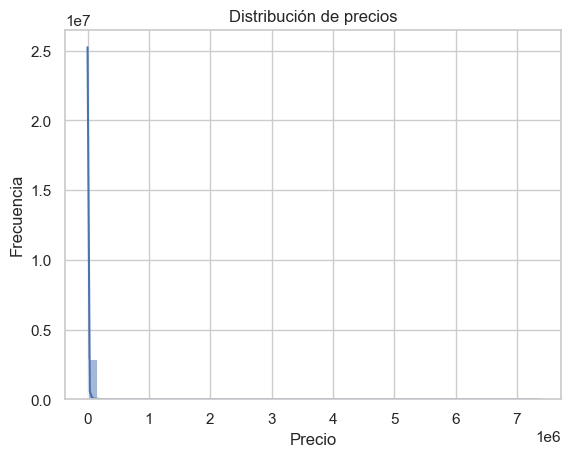

In [55]:

# Distribución de precios

sns.histplot(producto['productos_precio_lista'].dropna(), bins=50, kde=True)
plt.title("Distribución de precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

En ese grafico no puede verse mucho por la cantidad de valores dispersos. Con el objetivo de visualizar mejor la dispersion, graficamos la columna productos_precios del dataframe que no tiene los Outliers. Aprovechamos tambien para mostrar en el mismo gráfico la media y la mediana de ambos dataframes (con y sin ouliers).

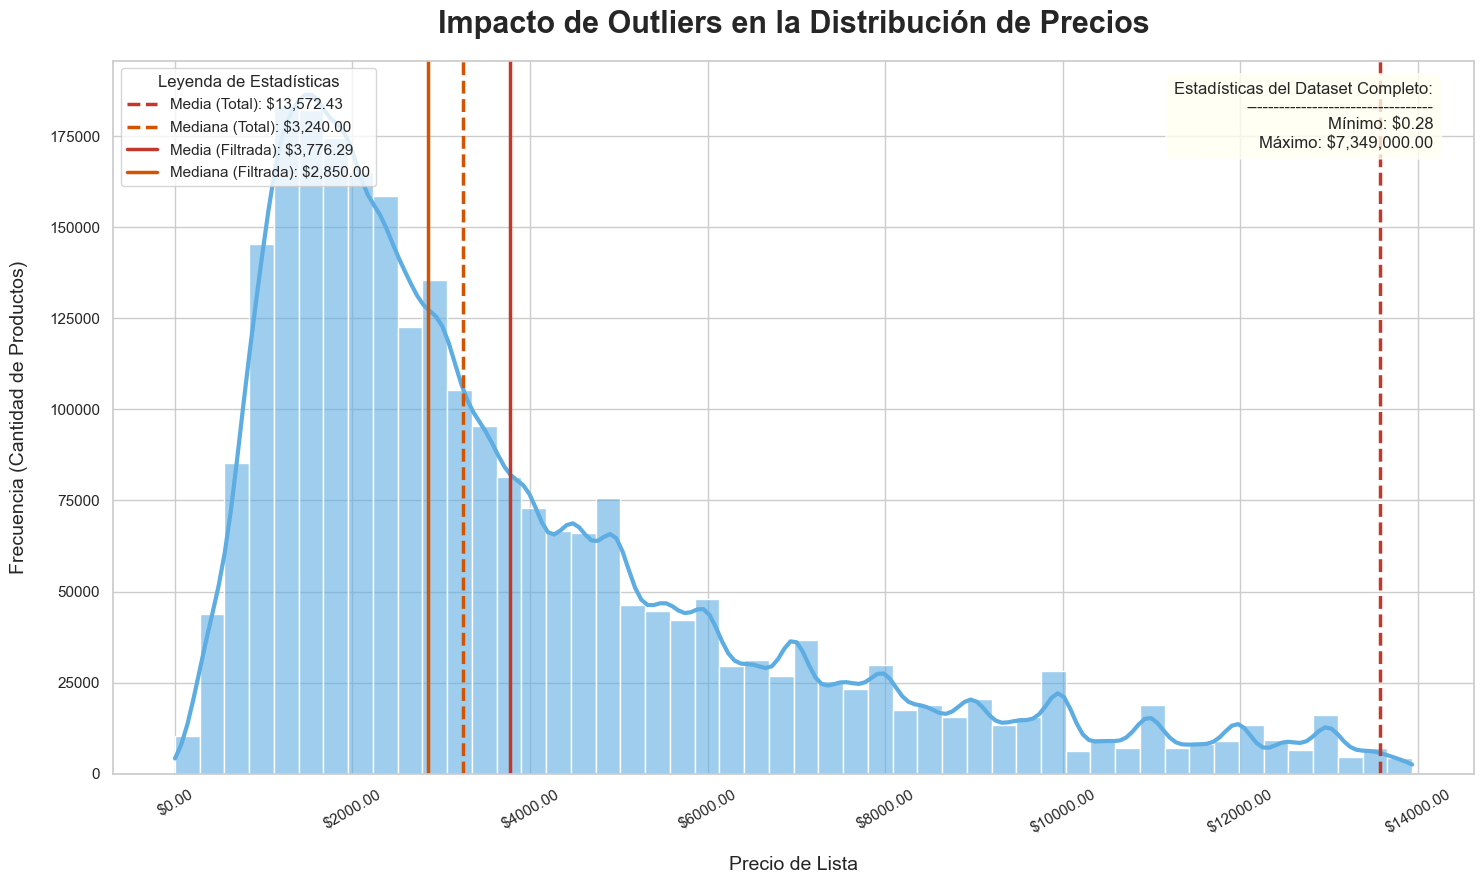

In [42]:
# 1. Definir la columna a graficar y analizar
columna_precio = 'productos_precio_lista'

# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="rocket")
plt.figure(figsize=(15, 9))

# 3. Graficar el histograma de los datos SIN outliers
ax = sns.histplot(
    data=producto_sin_outliers,
    x=columna_precio,
    bins=50,
    kde=True,
    color='#5dade2', # <-- ¡AQUÍ ESTÁ EL CAMBIO! Color celeste profesional
    alpha=0.6,
    line_kws={'linewidth': 3, 'color': '#2c3e50'}
)

# 4. Calcular y añadir las 4 líneas estadísticas
# --- Estadísticas del DataFrame COMPLETO (con outliers) ---
media_total = producto[columna_precio].mean()
mediana_total = producto[columna_precio].median()
plt.axvline(media_total, color='#c0392b', linestyle='--', linewidth=2.5, label=f'Media (Total): ${media_total:,.2f}')
plt.axvline(mediana_total, color='#d35400', linestyle='--', linewidth=2.5, label=f'Mediana (Total): ${mediana_total:,.2f}')

# --- Estadísticas del DataFrame FILTRADO (sin outliers) ---
media_filtrada = producto_sin_outliers[columna_precio].mean()
mediana_filtrada = producto_sin_outliers[columna_precio].median()
plt.axvline(media_filtrada, color='#c0392b', linestyle='-', linewidth=2.5, label=f'Media (Filtrada): ${media_filtrada:,.2f}')
plt.axvline(mediana_filtrada, color='#d35400', linestyle='-', linewidth=2.5, label=f'Mediana (Filtrada): ${mediana_filtrada:,.2f}')


# 5. Calcular Mín/Máx del DataFrame COMPLETO para el cuadro de texto
min_total = producto[columna_precio].min()
max_total = producto[columna_precio].max()
texto_estadisticas = (
    f"Estadísticas del Dataset Completo:\n"
    f"----------------------------------\n"
    f"Mínimo: ${min_total:,.2f}\n"
    f"Máximo: ${max_total:,.2f}"
)

# 6. Añadir el cuadro de texto
props = dict(boxstyle='round,pad=0.5', facecolor='ivory', alpha=0.8)
ax.text(0.97, 0.97, texto_estadisticas, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

# 7. Mejorar Títulos y Etiquetas
plt.title("Impacto de Outliers en la Distribución de Precios", fontsize=22, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=14, labelpad=15)
plt.ylabel("Frecuencia (Cantidad de Productos)", fontsize=14, labelpad=15)

# 8. Formatear el eje X para que parezca dinero
formatter = mticker.FormatStrFormatter('$%1.2f')
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=30)

# 9. Añadir una leyenda clara y bien ubicada
plt.legend(title='Leyenda de Estadísticas', fontsize=11, loc='upper left')

# 10. Ajustar el layout para que todo encaje
plt.tight_layout()

# 11. GUARDAR LA FIGURA EN UN ARCHIVO (antes de mostrarla)
plt.savefig('grafico_comparativo_precios.png', dpi=300, bbox_inches='tight')

# 12. Mostrar el gráfico en pantalla
plt.show()

# --- FIN DEL CÓDIGO DEL GRÁFICO ---

### Top marcas

¿Cuáles son las marcas con mas productos?

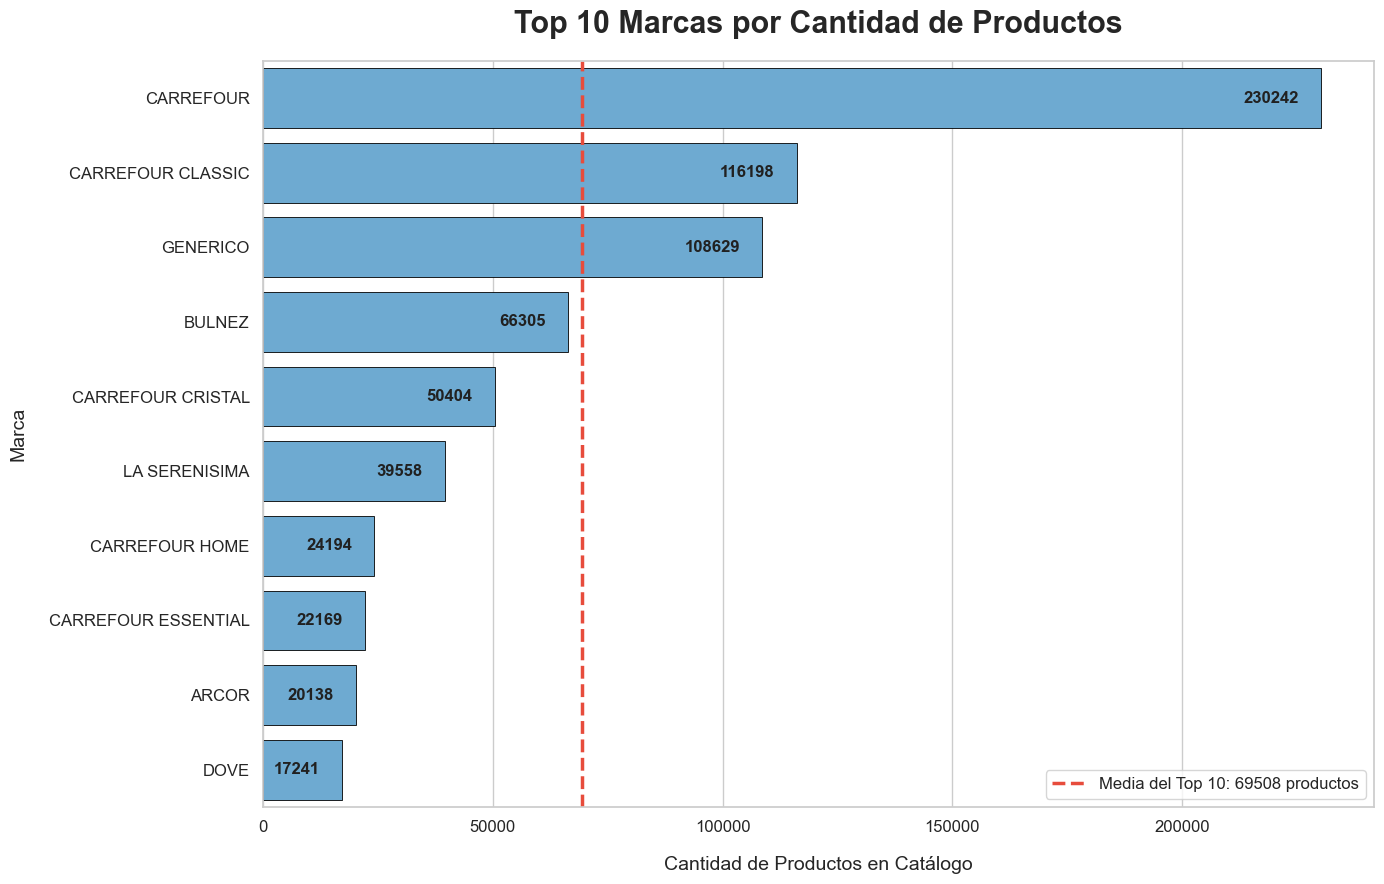

In [43]:
# 1. Preparar los datos
top_marcas = producto['productos_marca'].value_counts().head(10)

# 2. Calcular la media de productos para el Top 10 (la línea de referencia)
media_top10 = top_marcas.mean()

# 3. Establecer el tema y el tamaño de la figura
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 9))

# 4. Crear el gráfico de barras con el color celeste definido
ax = sns.barplot(
    x=top_marcas.values,
    y=top_marcas.index,
    color='#5dade2',  # <-- Color principal consistente con el gráfico anterior
    edgecolor='black',
    linewidth=0.6
)

# 5. Añadir la línea de la media con el color de acento rojo
ax.axvline(x=media_top10, color='#e74c3c', linestyle='--', linewidth=2.5,
            label=f'Media del Top 10: {media_top10:.0f} productos')

# 6. Añadir etiquetas de datos a las barras
#    Usaremos texto oscuro ya que el color de la barra es claro
for p in ax.patches:
    width = p.get_width()
    ax.text(width - (ax.get_xlim()[1] * 0.02), # Posición X (un 2% desde el borde)
            p.get_y() + p.get_height() / 2,
            f'{int(width)}',
            ha='right',
            va='center',
            fontsize=12,
            color='#212121', # Un negro no tan intenso, muy legible
            weight='bold')

# 7. Títulos y Etiquetas con el mismo estilo profesional
plt.title("Top 10 Marcas por Cantidad de Productos", fontsize=22, pad=20, weight='bold')
plt.xlabel("Cantidad de Productos en Catálogo", fontsize=14, labelpad=15)
plt.ylabel("Marca", fontsize=14, labelpad=15)

# 8. Ajustar los ticks de los ejes para mejor legibilidad
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# 9. Añadir la leyenda para explicar la línea roja
plt.legend(fontsize=12, loc='lower right') # Mover a la esquina inferior derecha

# 10. Ajustar el layout para que todo encaje
plt.tight_layout()

# 11. GUARDAR la figura en un archivo
plt.savefig('top_10_marcas_estilo_consistente.png', dpi=300, bbox_inches='tight')

# 12. Mostrar el gráfico
plt.show()

# --- FIN DEL CÓDIGO DEL GRÁFICO ---

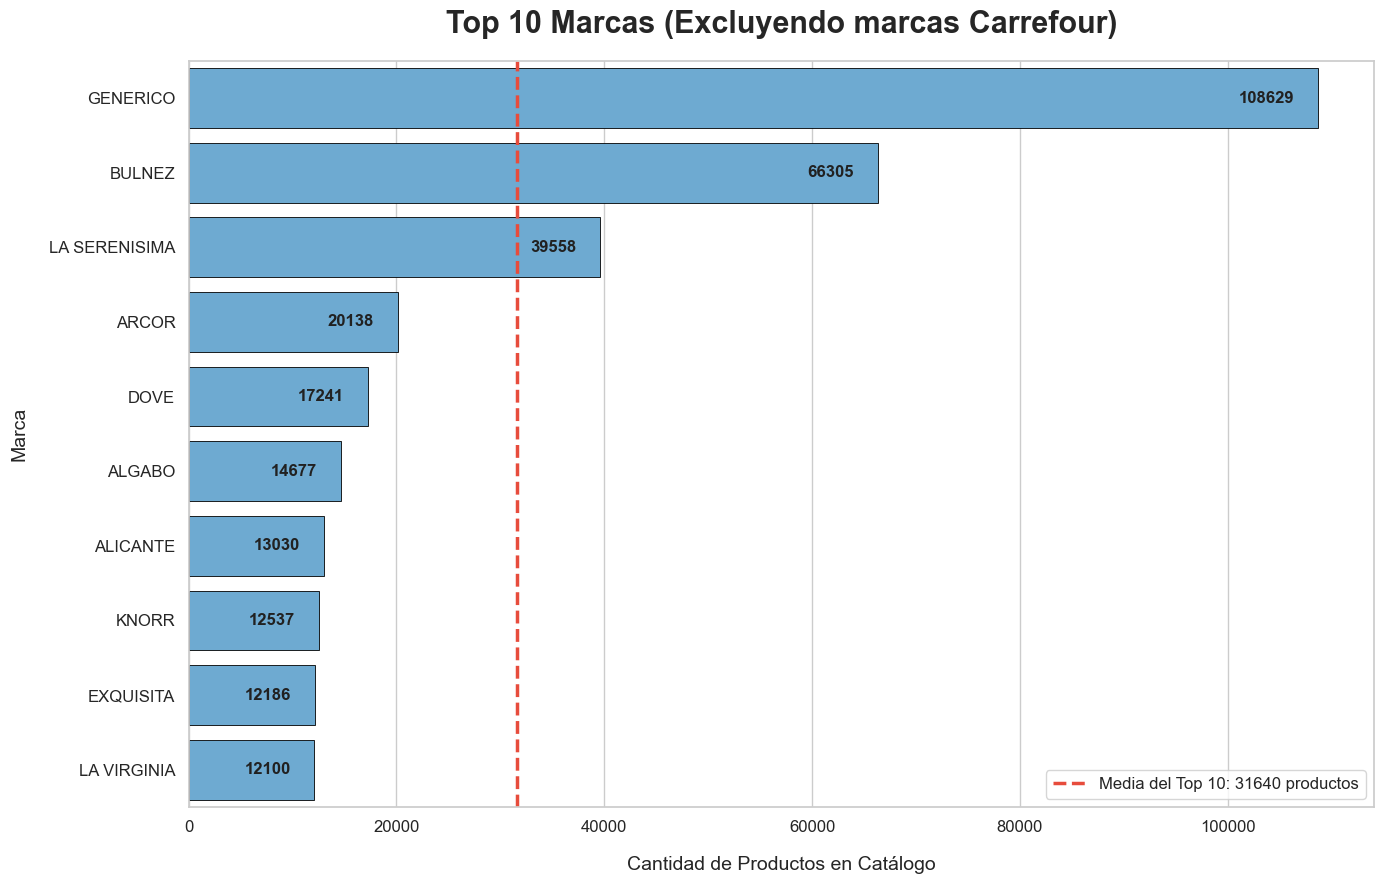

In [44]:


# --- INICIO DEL CÓDIGO ---

# 1. FILTRAR EL DATAFRAME
#    Crearemos un nuevo DataFrame llamado 'producto_filtrado'

# Condición 1: La marca NO debe ser 'S/D'.
filtro1 = producto['productos_marca'] != 'S/D'

# Condición 2: La marca NO debe contener 'CARREFOUR' (ignorando mayúsculas/minúsculas).
# El método .str.contains() es perfecto para esto.
# na=False asegura que los valores nulos (NaN) no den error y se traten como Falso.
filtro2 = ~producto['productos_marca'].str.contains('CARREFOUR', case=False, na=False)

# Aplicamos AMBOS filtros al DataFrame.
producto_filtrado = producto[filtro1 & filtro2]


# 2. PREPARAR LOS DATOS PARA EL GRÁFICO (usando el DataFrame filtrado)
top_marcas_filtrado = producto_filtrado['productos_marca'].value_counts().head(10)
media_top10_filtrado = top_marcas_filtrado.mean()


# 3. CREAR EL GRÁFICO (código idéntico en estilo al anterior)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 9))

ax = sns.barplot(
    x=top_marcas_filtrado.values,
    y=top_marcas_filtrado.index,
    color='#5dade2',
    edgecolor='black',
    linewidth=0.6
)

ax.axvline(x=media_top10_filtrado, color='#e74c3c', linestyle='--', linewidth=2.5,
            label=f'Media del Top 10: {media_top10_filtrado:.0f} productos')

for p in ax.patches:
    width = p.get_width()
    ax.text(width - (ax.get_xlim()[1] * 0.02),
            p.get_y() + p.get_height() / 2,
            f'{int(width)}',
            ha='right',
            va='center',
            fontsize=12,
            color='#212121',
            weight='bold')

# Cambiamos el título para reflejar el filtrado
plt.title("Top 10 Marcas (Excluyendo marcas Carrefour)", fontsize=22, pad=20, weight='bold')
plt.xlabel("Cantidad de Productos en Catálogo", fontsize=14, labelpad=15)
plt.ylabel("Marca", fontsize=14, labelpad=15)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()

# GUARDAR con un nombre de archivo diferente
plt.savefig('top_10_marcas_filtrado_carrefour.png', dpi=300, bbox_inches='tight')

plt.show()

# --- FIN DEL CÓDIGO ---

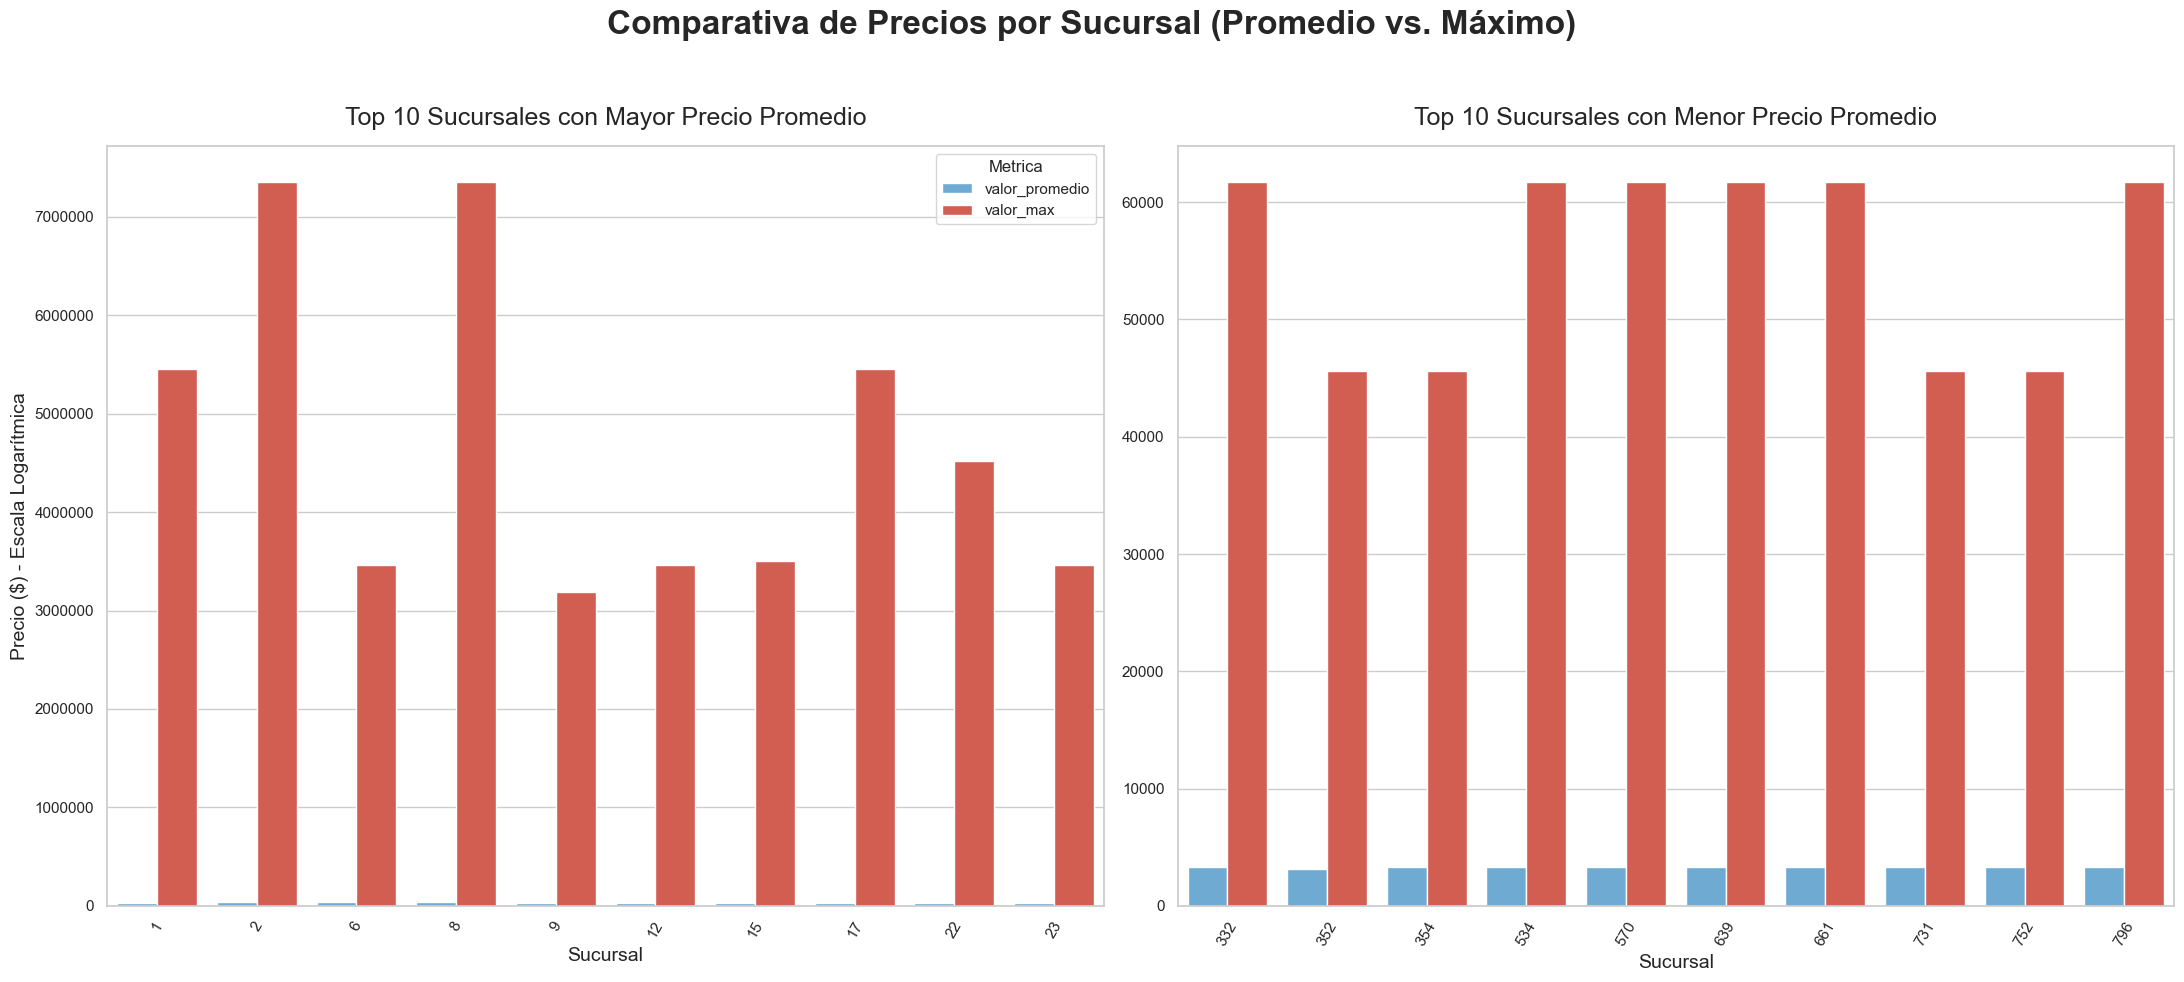

In [54]:
# Por sucursal:

# PASO 1: Agrupar por sucursal y calcular las estadísticas.
#print("Paso 1: Agrupando datos...")
sucursal_stats = producto.groupby('id_sucursal')['productos_precio_lista'].agg(
    valor_promedio='mean',
    valor_max='max'
).reset_index()


# PASO 2: Crear los dos DataFrames separados: Top 10 y Bottom 10.
#print("Paso 2: Creando los DataFrames Top 10 y Bottom 10...")
top_10_caros = sucursal_stats.nlargest(10, 'valor_promedio')
top_10_baratos = sucursal_stats.nsmallest(10, 'valor_promedio')


# PASO 3: Preparar los datos para un gráfico de barras agrupado.
# Usamos pd.melt() para transformar las columnas 'valor_promedio' y 'valor_max' en filas.
top_10_caros_long = pd.melt(top_10_caros, id_vars='id_sucursal', value_vars=['valor_promedio', 'valor_max'], var_name='Metrica', value_name='Precio')
top_10_baratos_long = pd.melt(top_10_baratos, id_vars='id_sucursal', value_vars=['valor_promedio', 'valor_max'], var_name='Metrica', value_name='Precio')


# PASO 4: Crear la figura con DOS subplots.
#print("Paso 3: Creando los gráficos...")
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
fig.suptitle("Comparativa de Precios por Sucursal (Promedio vs. Máximo)", fontsize=24, weight='bold')


# --- GRÁFICO IZQUIERDO: TOP 10 MÁS CARAS ---
ax_izq = axes[0]
sns.barplot(
    data=top_10_caros_long,
    x='id_sucursal',
    y='Precio',
    hue='Metrica', # Esto crea las barras agrupadas
    palette={'valor_promedio': '#5dade2', 'valor_max': '#e74c3c'},
    ax=ax_izq
)
ax_izq.set_title('Top 10 Sucursales con Mayor Precio Promedio', fontsize=18, pad=15)
ax_izq.set_xlabel('Sucursal', fontsize=14)
ax_izq.set_ylabel('Precio ($) - Escala Logarítmica', fontsize=14)


# --- GRÁFICO DERECHO: TOP 10 MÁS BARATAS ---
ax_der = axes[1]
sns.barplot(
    data=top_10_baratos_long,
    x='id_sucursal',
    y='Precio',
    hue='Metrica',
    palette={'valor_promedio': '#5dade2', 'valor_max': '#e74c3c'},
    ax=ax_der
)
ax_der.set_title('Top 10 Sucursales con Menor Precio Promedio', fontsize=18, pad=15)
ax_der.set_xlabel('Sucursal', fontsize=14)
ax_der.set_ylabel('') # No repetir la etiqueta del eje Y
ax_der.get_legend().remove() # Quitar leyenda duplicada


# --- !! LA SOLUCIÓN AL PROBLEMA DE ESCALA: ESCALA LOGARÍTMICA !! ---
# Aplicamos esto a AMBOS gráficos.
#ax_izq.set_yscale('log')
#ax_der.set_yscale('log')


# --- PASO 5: Mejoras finales y guardado ---

# Formatear el eje Y de ambos gráficos para que los números no estén en notación científica.
formatter = mticker.ScalarFormatter()
formatter.set_scientific(False)
ax_izq.yaxis.set_major_formatter(formatter)
ax_der.yaxis.set_major_formatter(formatter)

# Rotar las etiquetas del eje X en ambos gráficos para legibilidad.
ax_izq.tick_params(axis='x', rotation=60)
ax_der.tick_params(axis='x', rotation=60)

# Ajustar layout y guardar
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('grafico_barras_agrupado_final.png', dpi=300)
plt.show()



Paso 1: Agrupando datos...
Paso 2: Creando los DataFrames Top 10 y Bottom 10...
Paso 3: Creando los gráficos con doble eje...


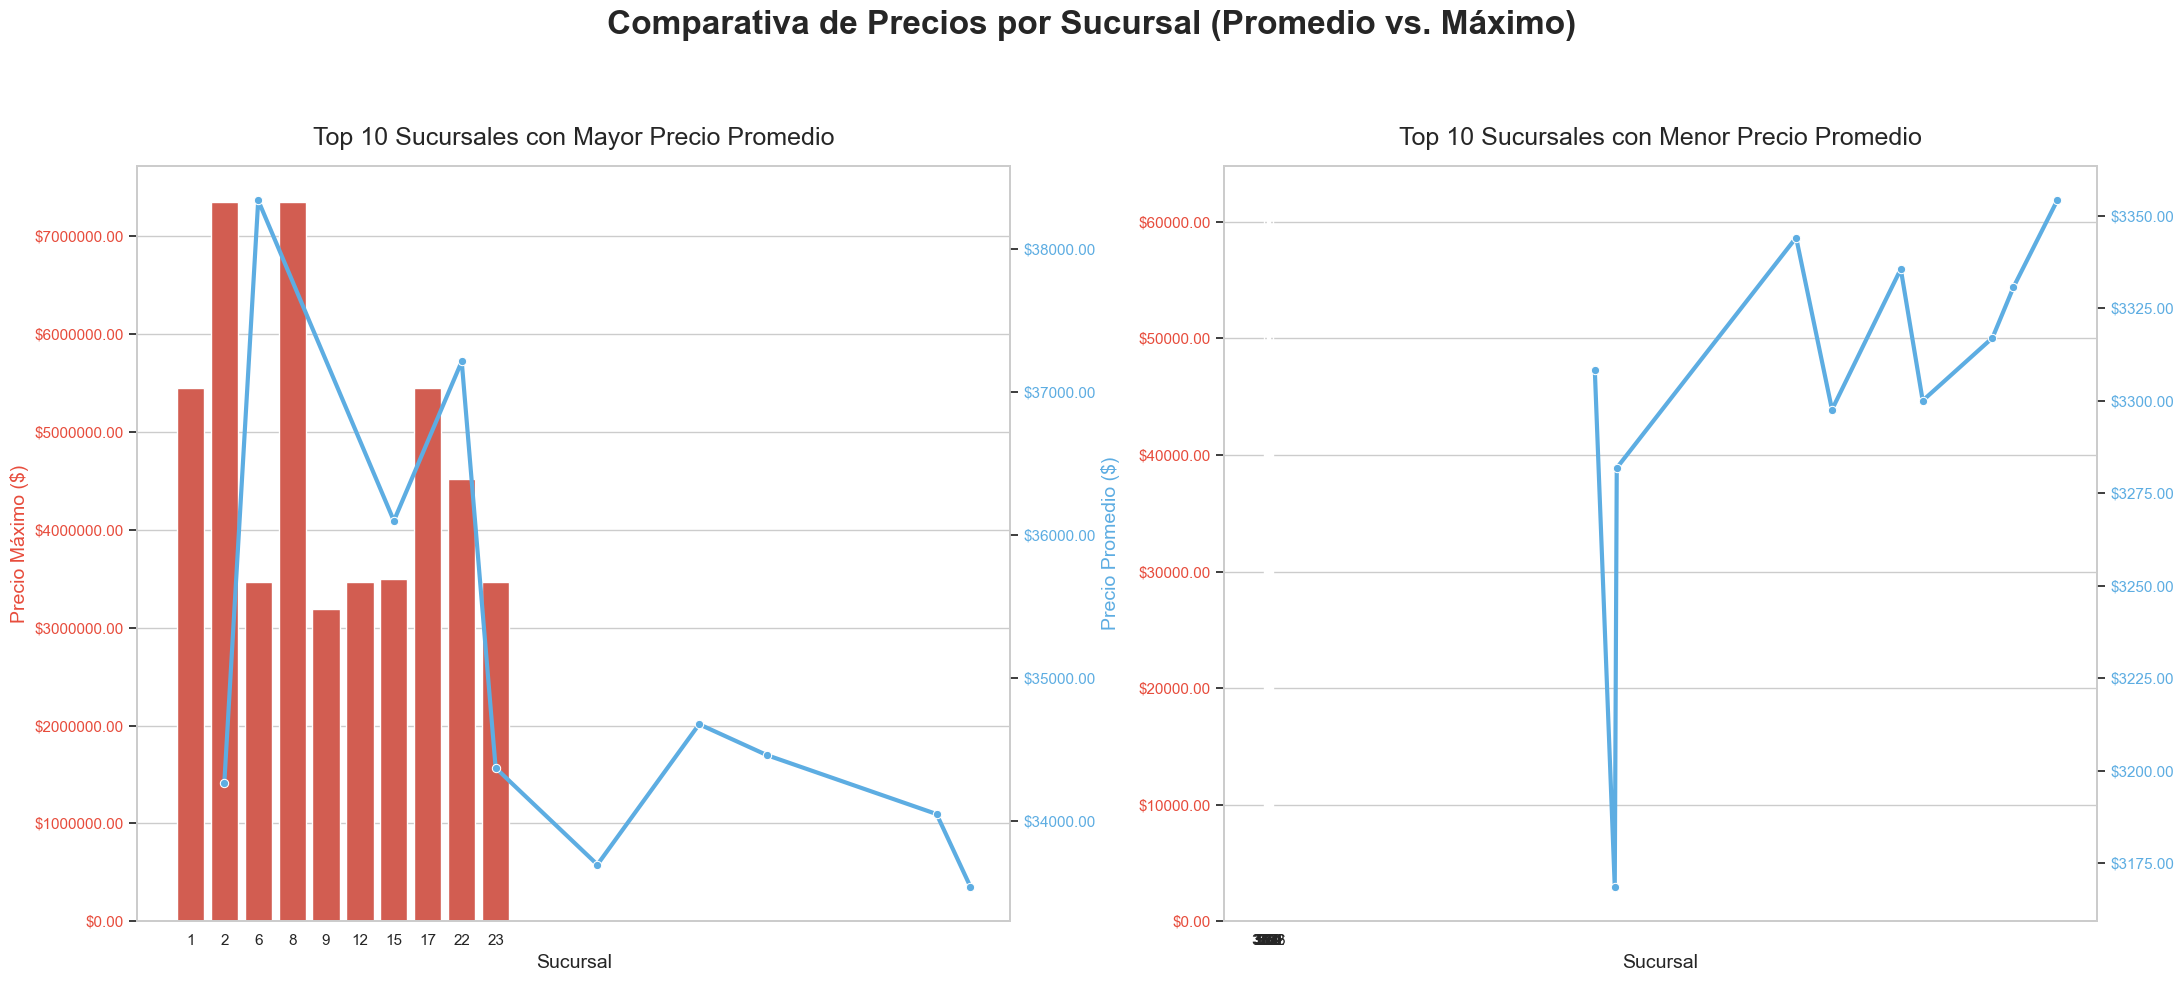


Proceso completado.


In [46]:
# No se por que no me sale este graficoooooo!!!!!!


# PASO 1: Agrupar por sucursal y calcular las estadísticas.
print("Paso 1: Agrupando datos...")
sucursal_stats = producto.groupby('id_sucursal')['productos_precio_lista'].agg(
    valor_promedio='mean',
    valor_max='max'
).reset_index()


# PASO 2: Crear los dos DataFrames separados: Top 10 y Bottom 10.
print("Paso 2: Creando los DataFrames Top 10 y Bottom 10...")
top_10_caros = sucursal_stats.nlargest(10, 'valor_promedio')
top_10_baratos = sucursal_stats.nsmallest(10, 'valor_promedio')


# PASO 3: Crear la figura con DOS subplots.
print("Paso 3: Creando los gráficos con doble eje...")
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
fig.suptitle("Comparativa de Precios por Sucursal (Promedio vs. Máximo)", fontsize=24, weight='bold')

# Definir colores para consistencia
color_maximo = '#e74c3c' # Rojo para el máximo (valor más grande)
color_promedio = '#5dade2' # Celeste para el promedio


# --- GRÁFICO IZQUIERDO: TOP 10 MÁS CARAS ---
ax_izq = axes[0]
# EJE IZQUIERDO (ax_izq) para el VALOR MÁXIMO
sns.barplot(
    data=top_10_caros, x='id_sucursal', y='valor_max',
    color=color_maximo, ax=ax_izq
)
ax_izq.set_ylabel('Precio Máximo ($)', color=color_maximo, fontsize=14)
ax_izq.tick_params(axis='y', labelcolor=color_maximo)
ax_izq.set_title('Top 10 Sucursales con Mayor Precio Promedio', fontsize=18, pad=15)
ax_izq.set_xlabel('Sucursal', fontsize=14)

# EJE DERECHO (ax_izq_twin) para el VALOR PROMEDIO
ax_izq_twin = ax_izq.twinx()
sns.lineplot(
    data=top_10_caros, x='id_sucursal', y='valor_promedio',
    color=color_promedio, marker='o', linewidth=3, ax=ax_izq_twin
)
ax_izq_twin.set_ylabel('Precio Promedio ($)', color=color_promedio, fontsize=14)
ax_izq_twin.tick_params(axis='y', labelcolor=color_promedio)
ax_izq_twin.grid(False) # Desactivar la segunda grilla para no saturar


# --- GRÁFICO DERECHO: TOP 10 MÁS BARATAS ---
ax_der = axes[1]
# EJE IZQUIERDO (ax_der) para el VALOR MÁXIMO
sns.barplot(
    data=top_10_baratos, x='id_sucursal', y='valor_max',
    color=color_maximo, ax=ax_der
)
ax_der.set_ylabel('') # No repetir etiqueta del eje
ax_der.tick_params(axis='y', labelcolor=color_maximo)
ax_der.set_title('Top 10 Sucursales con Menor Precio Promedio', fontsize=18, pad=15)
ax_der.set_xlabel('Sucursal', fontsize=14)

# EJE DERECHO (ax_der_twin) para el VALOR PROMEDIO
ax_der_twin = ax_der.twinx()
sns.lineplot(
    data=top_10_baratos, x='id_sucursal', y='valor_promedio',
    color=color_promedio, marker='o', linewidth=3, ax=ax_der_twin
)
ax_der_twin.set_ylabel('') # No repetir etiqueta del eje
ax_der_twin.tick_params(axis='y', labelcolor=color_promedio)
ax_der_twin.grid(False)


# --- PASO 4: Mejoras finales y guardado ---

# Formatear todos los ejes Y como moneda
formatter = mticker.FormatStrFormatter('$%1.2f')
for ax in [ax_izq, ax_der, ax_izq_twin, ax_der_twin]:
    ax.yaxis.set_major_formatter(formatter)

## Rotar las etiquetas del eje X en ambos gráficos
#for ax in [ax_izq, ax_der]:
#    ax.tick_params(axis='x', rotation=60)

# Crear una leyenda unificada
#from matplotlib.lines import Line2D
#legend_elements = [
#    plt.Rectangle((0,0),1,1, color=color_maximo, label='Precio Máximo'),
#    Line2D([0], [0], marker='o', color='w', markerfacecolor=color_promedio, markersize=10, label='Precio Promedio', linewidth=3)
#]
#fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2, fontsize=14)

# Ajustar layout y guardar
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.savefig('grafico_barras_doble_eje.png', dpi=300)
plt.show()

print("\nProceso completado.")

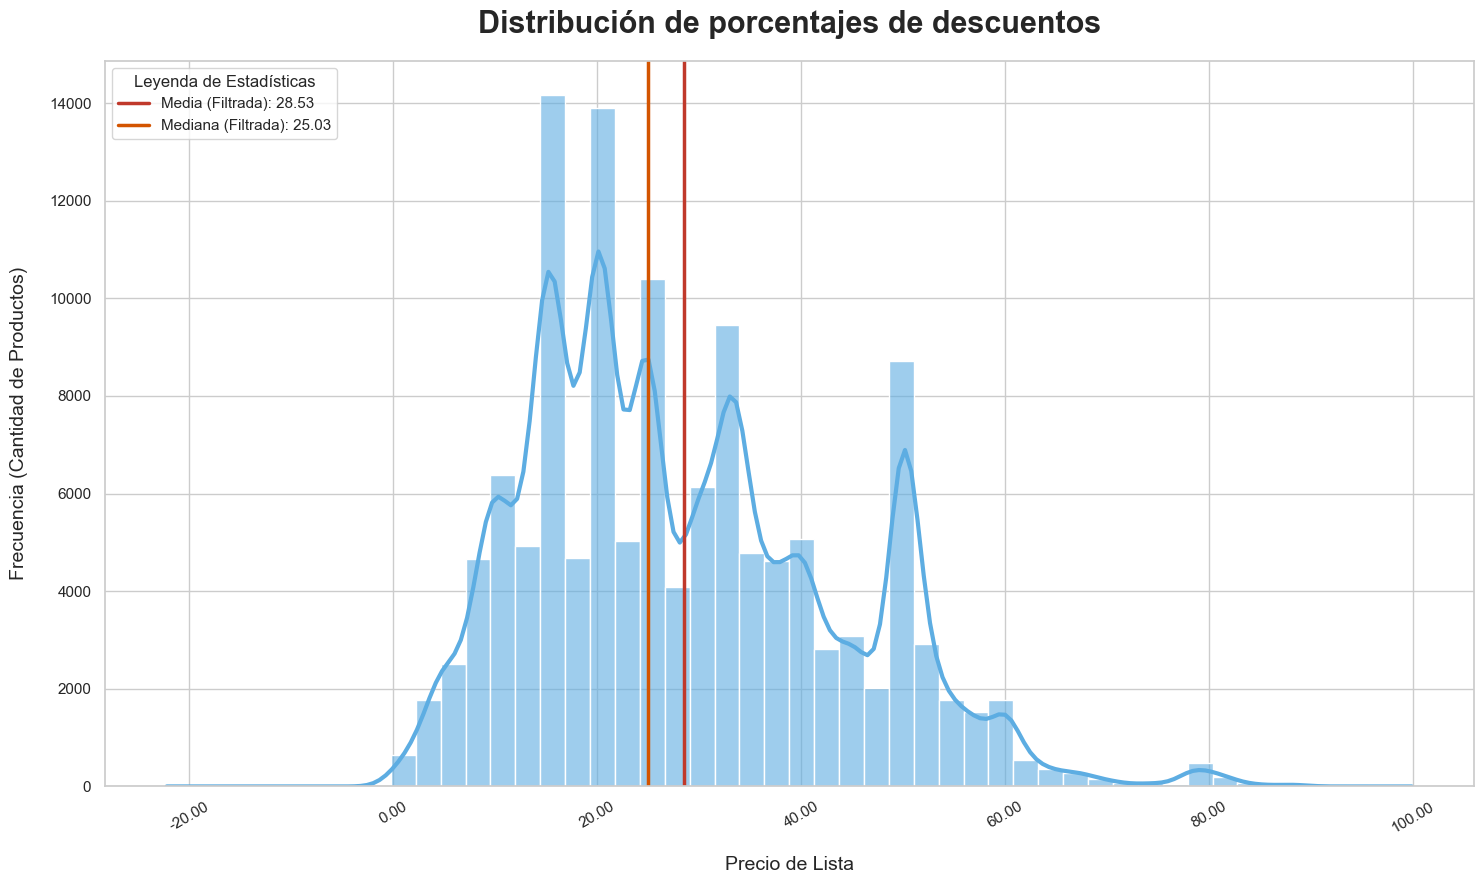

In [47]:
# --- INICIO DEL CÓDIGO DEL GRÁFICO ---

# 1. Definir la columna a graficar y analizar
columna_precio = 'descuento'

# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="rocket")
plt.figure(figsize=(15, 9))

# 3. Graficar el histograma de los datos SIN outliers
ax = sns.histplot(
    data=promociones,
    x=columna_precio,
    bins=50,
    kde=True,
    color='#5dade2', # <-- ¡AQUÍ ESTÁ EL CAMBIO! Color celeste profesional
    alpha=0.6,
    line_kws={'linewidth': 3, 'color': '#2c3e50'}
)

# --- Estadísticas del DataFrame FILTRADO (sin outliers) ---
media_filtrada = promociones[columna_precio].mean()
mediana_filtrada = promociones[columna_precio].median()
plt.axvline(media_filtrada, color='#c0392b', linestyle='-', linewidth=2.5, label=f'Media (Filtrada): {media_filtrada:,.2f}')
plt.axvline(mediana_filtrada, color='#d35400', linestyle='-', linewidth=2.5, label=f'Mediana (Filtrada): {mediana_filtrada:,.2f}')


# 5. Calcular Mín/Máx del DataFrame COMPLETO para el cuadro de texto
min_total = promociones[columna_precio].min()
max_total = promociones[columna_precio].max()
texto_estadisticas = (
    f"Estadísticas del Dataset Completo:\n"
    f"----------------------------------\n"
    f"Mínimo: {min_total:,.2f}\n"
    f"Máximo: {max_total:,.2f}"
)

# 6. Añadir el cuadro de texto
#props = dict(boxstyle='round,pad=0.5', facecolor='ivory', alpha=0.8)
#ax.text(0.97, 0.97, texto_estadisticas, transform=ax.transAxes, fontsize=12,
        #verticalalignment='top', horizontalalignment='right', bbox=props)

# 7. Mejorar Títulos y Etiquetas
plt.title("Distribución de porcentajes de descuentos", fontsize=22, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=14, labelpad=15)
plt.ylabel("Frecuencia (Cantidad de Productos)", fontsize=14, labelpad=15)

# 8. Formatear el eje X para que parezca dinero
formatter = mticker.FormatStrFormatter('%1.2f')
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=30)

# 9. Añadir una leyenda clara y bien ubicada
plt.legend(title='Leyenda de Estadísticas', fontsize=11, loc='upper left')

# 10. Ajustar el layout para que todo encaje
plt.tight_layout()

# 11. GUARDAR LA FIGURA EN UN ARCHIVO (antes de mostrarla)
plt.savefig('grafico_comparativo_precios.png', dpi=300, bbox_inches='tight')

# 12. Mostrar el gráfico en pantalla
plt.show()

In [59]:
df.columns

Index(['id_sucursal', 'id_producto', 'productos_descripcion',
       'productos_unidad_medida_presentacion', 'productos_marca',
       'productos_precio_lista', 'productos_precio_referencia',
       'productos_cantidad_referencia', 'productos_unidad_medida_referencia',
       'productos_precio_unitario_promo1', 'productos_leyenda_promo1',
       'descuento', 'id_bandera', 'sucursales_tipo',
       'sucursales_codigo_postal', 'sucursales_provincia',
       'comercio_bandera_nombre'],
      dtype='object')

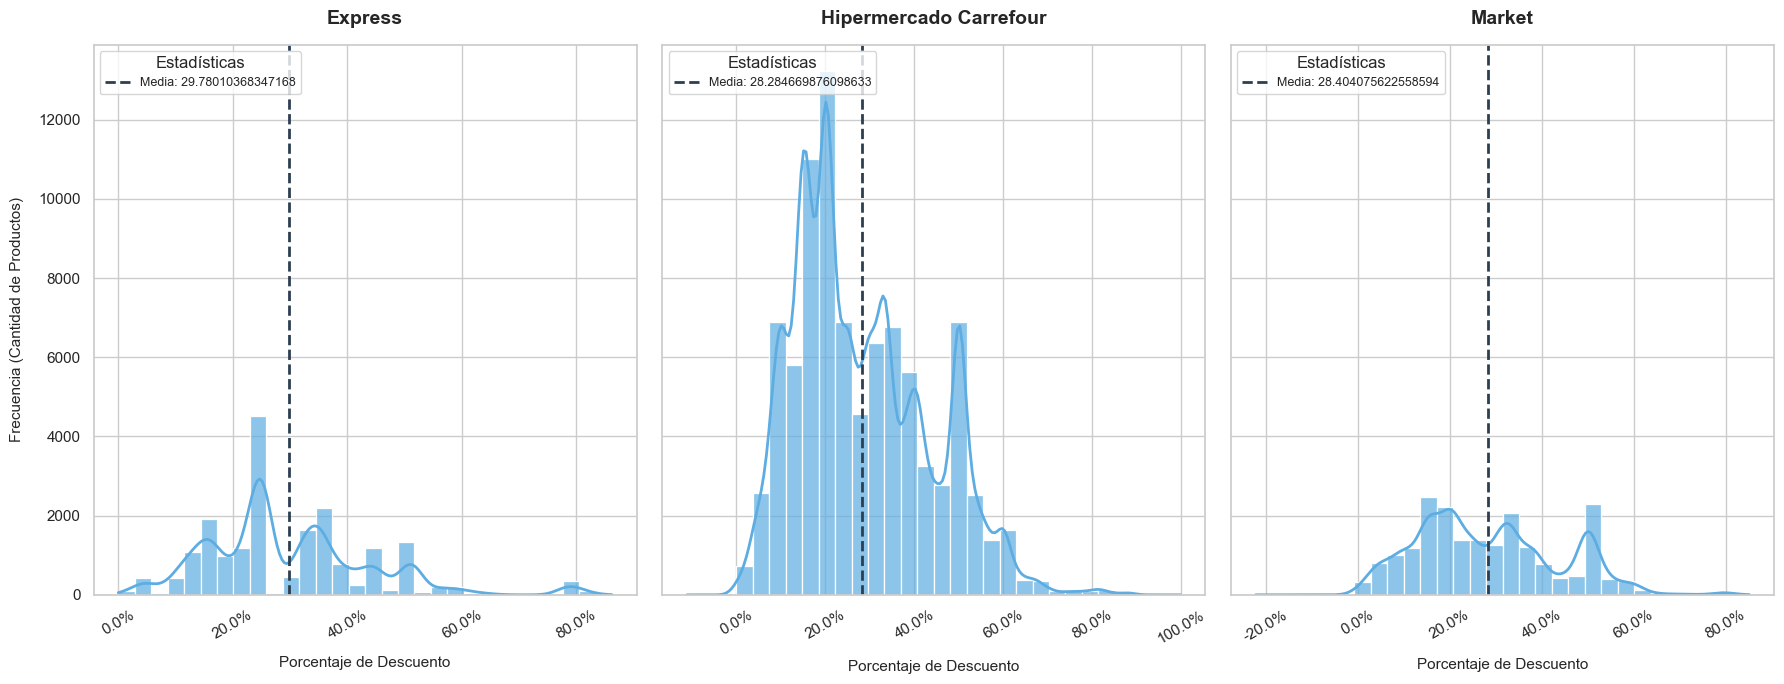

In [63]:

# 1. Definir las columnas a utilizar
columna_descuento = 'descuento'
columna_agrupacion = 'comercio_bandera_nombre'

# Limpieza y obtención de nombres únicos de banderas
if columna_agrupacion in df.columns:
    df[columna_agrupacion] = df[columna_agrupacion].str.strip()
    nombres_banderas_unicas = sorted(df[columna_agrupacion].dropna().unique())
else:
    print(f"Error: La columna '{columna_agrupacion}' no se encuentra en el DataFrame.")
    exit()

n_plots = len(nombres_banderas_unicas)
if n_plots == 0:
    print(f"No hay datos válidos en la columna '{columna_agrupacion}' para graficar.")
    exit()

# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="rocket")
fig, axes = plt.subplots(1, n_plots, figsize=(18, 7), sharey=True)

if n_plots == 1:
    axes = [axes]

# 3. Graficar en cada subplot
for i, nombre_bandera_actual in enumerate(nombres_banderas_unicas):
    data_filtrada = df[df[columna_agrupacion] == nombre_bandera_actual].copy()

    ax = axes[i]

    # Graficar el histograma y la curva KDE
    sns.histplot(
        data=data_filtrada,
        x=columna_descuento,
        bins=30,
        kde=True,
        color='#5dade2',
        alpha=0.7,
        line_kws={'linewidth': 2, 'color': '#2c3e50'},
        ax=ax
    )

    # Calcular la media de descuento para el grupo actual
    media_descuento = data_filtrada[columna_descuento].mean()

    # Formatear la media para mostrarla
    media_formateada = f"{media_descuento}" # Formato de porcentaje con un decimal

    # Añadir una línea vertical para indicar la media
    ax.axvline(media_descuento, color='#2c3e50', linestyle='--', linewidth=2, label=f'Media: {media_formateada}')

    # Títulos y Etiquetas
    ax.set_title(f"{nombre_bandera_actual}", fontsize=14, pad=15, weight='bold')
    ax.set_xlabel("Porcentaje de Descuento", fontsize=11, labelpad=10)
    if i == 0:
        ax.set_ylabel("Frecuencia (Cantidad de Productos)", fontsize=11, labelpad=10)
    else:
        ax.set_ylabel("")

    # Formatear el eje X
    formatter = mticker.FormatStrFormatter('%.1f%%')
    ax.xaxis.set_major_formatter(formatter)
    ax.tick_params(axis='x', rotation=30)

    # 9. Añadir la leyenda específica para la media del subplot actual
    # El parámetro 'label' en ax.axvline se usa para crear la entrada de la leyenda
    ax.legend(title='Estadísticas', fontsize=9, loc='upper left') # Añadir leyenda por subplot


# Ajustar el layout general
plt.tight_layout()

# Guardar la figura (opcional)
# plt.savefig('distribucion_descuentos_con_media_por_bandera.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

Si observamos la media de descuento, podemos ver que en los tres tipos de comercio, son practicamente iguales. Como es de esperarse, en el hipermercado hay muchos mas productos en descuento y tiene una distribucion un poco mas aguda con menos dispersion. En todos los mercados la distribucion tiene forma de normal, pero ver que en todos los casos, hay una barra un poco mas alta que los demas valores en 50 %.

In [71]:
df['sucursales_provincia'].unique()

array(['AR-E', 'AR-B', 'AR-C', 'AR-Q', 'AR-U', 'AR-M', 'AR-Z', 'AR-S',
       'AR-X', 'AR-K', 'AR-H', 'AR-W', 'AR-R', 'AR-J', 'AR-A', 'AR-T',
       'AR-F', 'AR-V', 'AR-L', 'AR-P', 'AR-D', 'AR-Y'], dtype=object)

In [ ]:
# la columna sucursales provincia tiene registrado mediante codigos como AR-E, AR-B, etc. Haremos una transformacion según la norma ISO 3166-2.
mapeo_provincia_df = pd.DataFrame({
    'sucursales_provincia': [
        'AR-E', 'AR-B', 'AR-C', 'AR-Q', 'AR-U', 'AR-M', 'AR-Z', 'AR-S',
        'AR-X', 'AR-K', 'AR-H', 'AR-W', 'AR-R', 'AR-J', 'AR-A', 'AR-T',
        'AR-F', 'AR-V', 'AR-L', 'AR-P', 'AR-D', 'AR-Y'
    ],
    'nombre_provincia_completo': [
        'Entre Ríos', 'Buenos Aires', 'CABA', 'Neuquén', 'Chubut', 'Mendoza', 'Santa Cruz', 'Santa Fe',
        'Córdoba', 'Catamarca', 'Chaco', 'Corrientes', 'Río Negro', 'Jujuy', 'Salta', 'Corrientes', # Ojo con duplicados como Corrientes
        'Formosa', 'Tierra del Fuego', 'La Pampa', 'Misiones', 'San Luis', 'Tucumán' # Ajustar según la lista más fiable
    ]
})

# Ajustar algunas asignaciones basadas en la lista más fiable si es necesario
# (Por ejemplo, si AR-W y AR-T son Corrientes, o AR-F es Formosa)
# Una lista más consolidada podría ser:
mapeo_provincia_df = pd.DataFrame({
    'sucursales_provincia': ['AR-A', 'AR-B', 'AR-C', 'AR-D', 'AR-E', 'AR-F', 'AR-G', 'AR-H',
                             'AR-J', 'AR-K', 'AR-L', 'AR-M', 'AR-N', 'AR-O', 'AR-P', 'AR-Q',
                             'AR-R', 'AR-S', 'AR-T', 'AR-U', 'AR-V', 'AR-X', 'AR-Y', 'AR-Z'],
    'nombre_provincia_completo': ['Salta', 'Buenos Aires', 'CABA', 'San Luis', 'Entre Ríos', 'Formosa', 'Santiago del Estero', 'Chaco',
                                  'Jujuy', 'Catamarca', 'La Pampa', 'Mendoza', 'Misiones', 'La Rioja', 'Misiones', 'Neuquén', # AR-P=Misiones
                                  'Río Negro', 'Santa Fe', 'Corrientes', 'Chubut', 'Tierra del Fuego', 'Córdoba', 'Tucumán', 'Santa Cruz']
})

# Luego, fusionas este mapeo con tu DataFrame df:
df = df.merge(mapeo_provincia_df, on='sucursales_provincia', how='left')

# Y en tu código de gráfico, usarías 'nombre_provincia_completo' como columna de agrupación:
columna_agrupacion = 'nombre_provincia_completo'
# ... y el resto del código para graficar seguiría igual, pero usando esta nueva columna.

C:\Users\nahue\AppData\Local\Temp\ipykernel_22848\1075385546.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


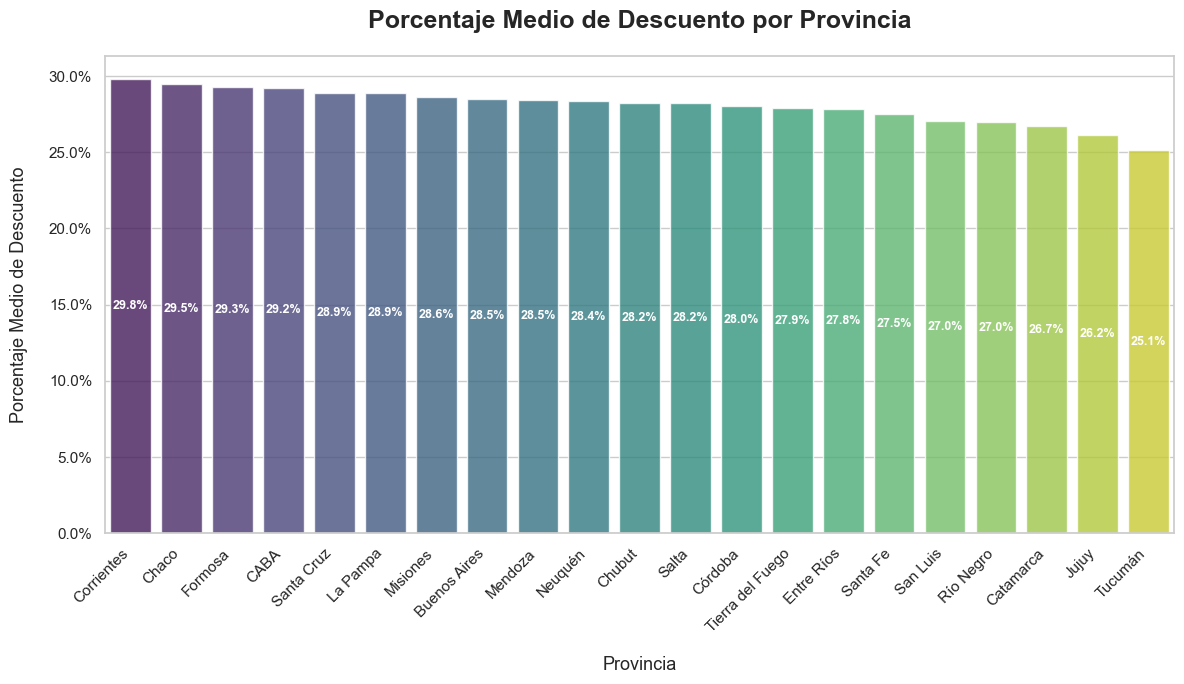

In [70]:


# 1. Definir las columnas relevantes
columna_descuento = 'descuento'
columna_agrupacion = 'nombre_provincia_completo'

# Limpieza de la columna de agrupación y obtención de las provincias únicas
if columna_agrupacion in df.columns:
    # Eliminar espacios en blanco alrededor de los nombres de provincia
    df[columna_agrupacion] = df[columna_agrupacion].str.strip()
    
    # Eliminar filas donde la provincia o el descuento sean NaN
    df_cleaned = df.dropna(subset=[columna_descuento, columna_agrupacion]).copy()

    # Obtener las provincias únicas y ordenarlas alfabéticamente
    provincias_unicas = sorted(df_cleaned[columna_agrupacion].unique())
else:
    print(f"Error: La columna '{columna_agrupacion}' no se encuentra en el DataFrame.")
    exit()

if not provincias_unicas:
    print(f"No hay datos válidos en la columna '{columna_agrupacion}' para graficar.")
    exit()

# 2. Agrupar por provincia y calcular la media de descuento
# Dado que el descuento ya va de 0 a 100, la media se calcula directamente.
df_media_por_provincia = df_cleaned.groupby(columna_agrupacion)[columna_descuento].mean().reset_index()

# Ordenar el resultado por la media de descuento para una mejor visualización
df_media_por_provincia = df_media_por_provincia.sort_values(by=columna_descuento, ascending=False)

# 3. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="viridis") # Cambié palette para que combine con el gráfico de barras
plt.figure(figsize=(12, 7))

# 4. Graficar el barplot usando los datos agrupados
ax = sns.barplot(
    data=df_media_por_provincia,
    x=columna_agrupacion,
    y=columna_descuento,
    order=df_media_por_provincia[columna_agrupacion],
    palette="viridis",
    alpha=0.8,
    errorbar=None
)

# 5. Añadir Títulos y Etiquetas
plt.title("Porcentaje Medio de Descuento por Provincia", fontsize=18, pad=20, weight='bold')
plt.xlabel("Provincia", fontsize=13, labelpad=15)
plt.ylabel("Porcentaje Medio de Descuento", fontsize=13, labelpad=15)

# 6. Formatear el eje Y para que muestre porcentajes correctamente (0-100)
# Usamos FuncFormatter para mayor control, ya que el Label es directamente el valor
formatter = mticker.FuncFormatter(lambda y, _: '{:.1f}%'.format(y))
ax.yaxis.set_major_formatter(formatter)

# Rotar las etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=11)

# 7. Añadir los valores de la media encima de cada barra
for container in ax.containers:
    # Formatear la altura de la barra como porcentaje con un decimal
    labels = [f'{h.get_height():.1f}%' for h in container.get_children()]
    ax.bar_label(container, labels=labels, label_type='center', color='white', fontsize=9, weight='bold')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

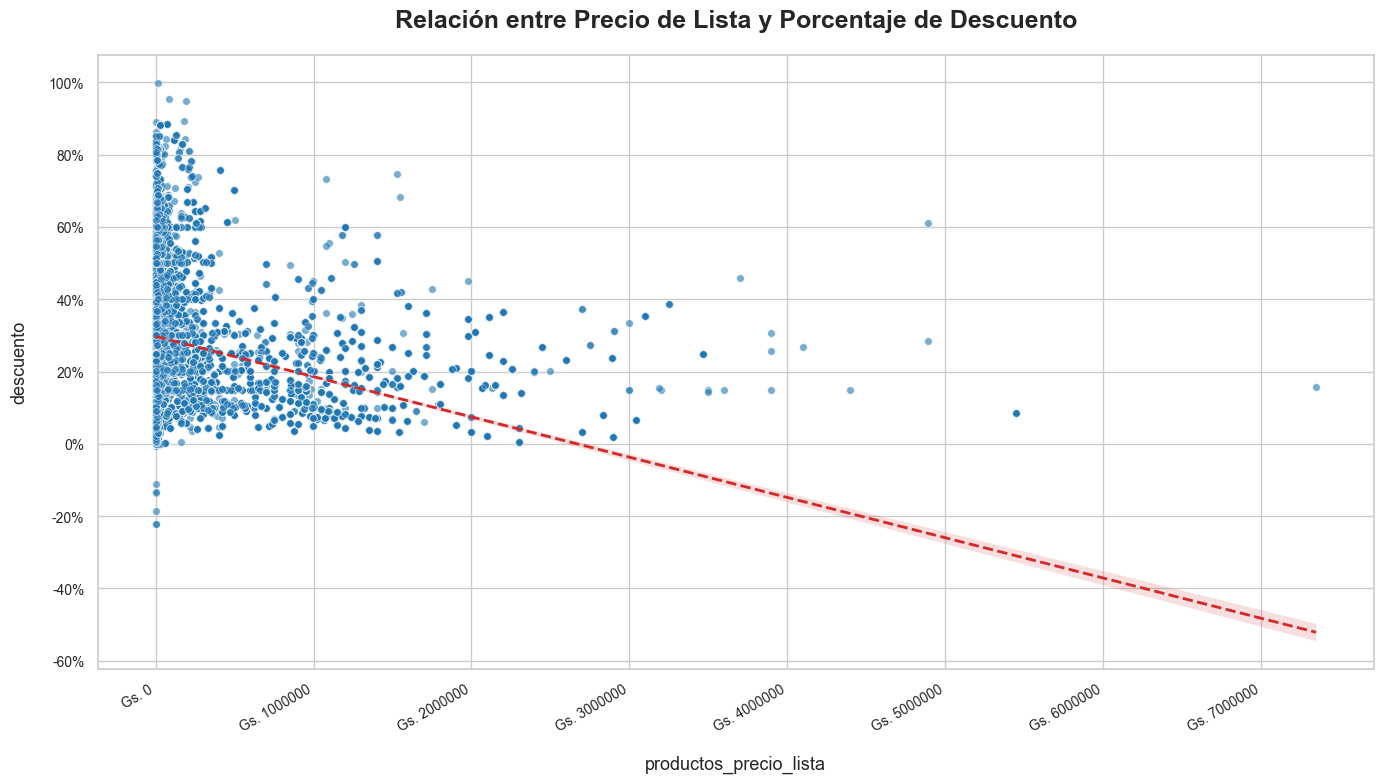

In [72]:


# 1. Definir las columnas para el scatter plot
columna_precio = 'productos_precio_lista'
columna_descuento = 'descuento'


df_plot = df.dropna(subset=[columna_precio, columna_descuento]).copy()


# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="viridis") # Un palette agradable para los puntos
plt.figure(figsize=(14, 8))

# 3. Crear el scatter plot
# Usamos scatterplot de seaborn, que permite más opciones que matplotlib.pyplot.scatter
ax = sns.scatterplot(
    data=df_plot,
    x=columna_precio,
    y=columna_descuento,
    alpha=0.6,       # Transparencia para ver densidad de puntos
    s=30,            # Tamaño de los puntos
    color='#1f77b4', # Un color azul consistente (puedes cambiarlo o usar palette)
    edgecolor='w',   # Borde blanco para los puntos
    linewidth=0.5
)

# 4. Títulos y Etiquetas
plt.title("Relación entre Precio de Lista y Porcentaje de Descuento", fontsize=18, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=13, labelpad=15)
plt.ylabel("Porcentaje de Descuento", fontsize=13, labelpad=15)

# 5. Formatear los ejes para mejor legibilidad
# Formato de moneda para el eje X (Precio de Lista)
# Puedes ajustar el símbolo y el formato según tus necesidades (ej: '$' o '€')
price_formatter = mticker.FormatStrFormatter('Gs. %.0f') # Si los precios son enteros, '%.0f'
ax.xaxis.set_major_formatter(price_formatter)

# Formato de porcentaje para el eje Y (Descuento)
discount_formatter = mticker.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)) # Sin decimales si es 0-100
ax.yaxis.set_major_formatter(discount_formatter)

# Rotar etiquetas del eje X si es necesario (raro para precios, pero puede ser útil)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)


# 6. Añadir una línea de regresión (opcional pero muy útil para scatter plots)
# Esto mostrará la tendencia lineal general entre las dos variables.
sns.regplot(
    data=df_plot,
    x=columna_precio,
    y=columna_descuento,
    scatter=False, # No queremos que regplot dibuje los puntos de nuevo
    color='#d62728', # Color para la línea de regresión
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

# 7. Añadir una pequeña leyenda para la línea de regresión (si se añadió)
# Si el regplot no genera una leyenda automáticamente, puedes añadirla manualmente
# ax.plot([], [], color='#d62728', linestyle='--', linewidth=2, label='Tendencia Lineal')
# ax.legend(title='Tendencia', loc='upper left', fontsize=10)


# 8. Ajustar el layout
plt.tight_layout()

# 9. Mostrar el gráfico
plt.show()

In [74]:


# 1. Definir las columnas para el scatter plot
columna_precio = 'productos_precio_lista'
columna_descuento = 'descuento'


df_plot = df.dropna(subset=[columna_precio, columna_descuento]).loc[df_plot['productos_precio_lista']<10000].copy()
df_plot

,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,descuento,id_bandera,sucursales_tipo,sucursales_codigo_postal,sucursales_provincia,comercio_bandera_nombre,nombre_provincia_completo
0,240,7798422850978,SERVILLETAS RAYAS PLATA X20 UDS MESA HOGAR,UNI,GENERICO,3790.0,3790.000000,1,UNI,2190.00,Promo A valida desde el 23/04/2025 hasta 30/06...,42.216358,1,Hipermercado,2820,AR-E,Hipermercado Carrefour,Entre Ríos
1,2,7791398072535,MAMADERA SILICONA 140 ML FR 6M,UNI,<NA>,8590.0,8590.000000,1,UNI,3990.00,Promo A valida desde el 01/06/2025 hasta 01/08...,53.550644,1,Hipermercado,1638,AR-B,Hipermercado Carrefour,Buenos Aires
2,239,3615004514896,CARGADOR CELULAR POSS 5W BLANCO PSWC 1AWH 18,UNI,<NA>,9900.0,9900.000000,1,UNI,4950.00,Promo A valida desde el 24/06/2025 hasta 30/06...,50.000000,1,Hipermercado,1617,AR-B,Hipermercado Carrefour,Buenos Aires
3,341,7790310985274,PALITOS DE MAIZ QUESO CHEETOS X 43 GRS,UNI,CHEETOS,1685.0,3918.600098,43,GRS,1432.25,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001,3,Supermercado,1053,AR-C,Express,CABA
5,179,7791905002413,CEBO MATA CUCARACHAS CUCA TRAP X 8 UNI,UNI,CUCA TRAP,6969.0,871.119995,8,UNI,3145.00,Promo A valida desde el 13/06/2025 hasta 22/07...,54.871578,1,Hipermercado,9120,AR-U,Hipermercado Carrefour,Chubut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130124,421,7790950133288,APERITIVO S ALCOHOL LIMON CERO TERMA X 1.35 LT,UNI,TERMA,2265.0,1677.780029,1350,CM3,1700.00,Promo A valida desde el 25/06/2025 hasta 30/06...,24.944813,3,Autoservicio,1210,AR-C,Express,CABA
130125,710,7795947005128,SANDWICH TRIPLE MIGA JQ P BLANCO EL MERCADO X ...,UNI,CARREFOUR EL MERCADO,4790.0,1596.670044,3,UNI,3690.00,Promo A valida desde el 05/06/2025 hasta 30/06...,22.964508,3,Autoservicio,1431,AR-C,Express,CABA
130126,53,7798135921088,ROLLO FILM ADHERENTE BULNEZ X 20 MTS,UNI,BULNEZ,2490.0,2490.000000,1,UNI,1990.00,Promo A valida desde el 10/04/2025 hasta 01/07...,20.080322,1,Hipermercado,8300,AR-Q,Hipermercado Carrefour,Neuquén
130127,456,7791720036471,EDULCORANTE SUCRALOSA CRF CLASSIC SOBRES X 50 UNI,UNI,CARREFOUR CLASSIC,2290.0,45.799999,50,UNI,1534.00,Promo A valida desde el 26/06/2025 hasta 01/07...,33.013100,3,Autoservicio,1824,AR-B,Express,Buenos Aires


In [ ]:


# 1. Definir las columnas para el scatter plot
columna_precio = 'productos_precio_lista'
columna_descuento = 'descuento'


df_plot = df.dropna(subset=[columna_precio, columna_descuento]).copy()


# 2. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="viridis") # Un palette agradable para los puntos
plt.figure(figsize=(14, 8))

# 3. Crear el scatter plot
# Usamos scatterplot de seaborn, que permite más opciones que matplotlib.pyplot.scatter
ax = sns.scatterplot(
    data=df_plot,
    x=columna_precio,
    y=columna_descuento,
    alpha=0.6,       # Transparencia para ver densidad de puntos
    s=30,            # Tamaño de los puntos
    color='#1f77b4', # Un color azul consistente (puedes cambiarlo o usar palette)
    edgecolor='w',   # Borde blanco para los puntos
    linewidth=0.5
)

# 4. Títulos y Etiquetas
plt.title("Relación entre Precio de Lista y Porcentaje de Descuento", fontsize=18, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=13, labelpad=15)
plt.ylabel("Porcentaje de Descuento", fontsize=13, labelpad=15)

# 5. Formatear los ejes para mejor legibilidad
# Formato de moneda para el eje X (Precio de Lista)
# Puedes ajustar el símbolo y el formato según tus necesidades (ej: '$' o '€')
price_formatter = mticker.FormatStrFormatter('Gs. %.0f') # Si los precios son enteros, '%.0f'
ax.xaxis.set_major_formatter(price_formatter)

# Formato de porcentaje para el eje Y (Descuento)
discount_formatter = mticker.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)) # Sin decimales si es 0-100
ax.yaxis.set_major_formatter(discount_formatter)

# Rotar etiquetas del eje X si es necesario (raro para precios, pero puede ser útil)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)


# 6. Añadir una línea de regresión (opcional pero muy útil para scatter plots)
# Esto mostrará la tendencia lineal general entre las dos variables.
sns.regplot(
    data=df_plot,
    x=columna_precio,
    y=columna_descuento,
    scatter=False, # No queremos que regplot dibuje los puntos de nuevo
    color='#d62728', # Color para la línea de regresión
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

# 7. Añadir una pequeña leyenda para la línea de regresión (si se añadió)
# Si el regplot no genera una leyenda automáticamente, puedes añadirla manualmente
# ax.plot([], [], color='#d62728', linestyle='--', linewidth=2, label='Tendencia Lineal')
# ax.legend(title='Tendencia', loc='upper left', fontsize=10)


# 8. Ajustar el layout
plt.tight_layout()

# 9. Mostrar el gráfico
plt.show()

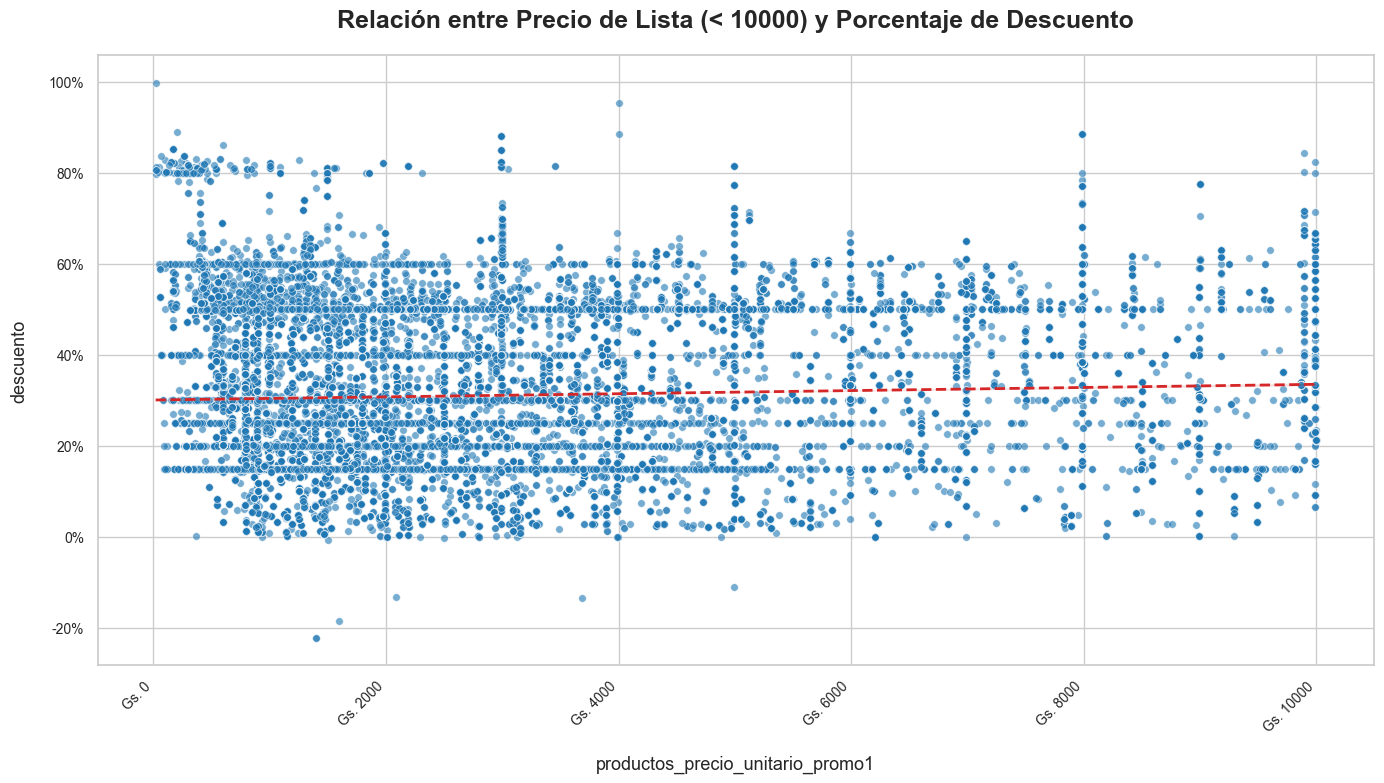

In [79]:


# 1. Definir las columnas
columna_precio = 'productos_precio_unitario_promo1'
columna_descuento = 'descuento'

# Verificar que las columnas existan
if columna_precio not in df.columns or columna_descuento not in df.columns:
    print(f"Error: Una o ambas columnas ('{columna_precio}', '{columna_descuento}') no se encuentran en el DataFrame.")
    exit()

# 2. Filtrar el DataFrame para incluir solo precios menores a 10000
# Usamos .loc para una selección basada en la condición
df_filtrado_precio = df.loc[df[columna_precio] < 10000].copy()

# Limpiar datos del DataFrame filtrado (eliminar NaN en las columnas de interés)
df_filtrado_precio = df_filtrado_precio.dropna(subset=[columna_precio, columna_descuento]).copy()

# Verificar si quedan datos después del filtrado
if df_filtrado_precio.empty:
    print("No hay datos con precios menores a 10000 para graficar después de limpiar NaN.")
    exit()

# 3. Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="whitegrid", palette="viridis")
plt.figure(figsize=(14, 8))

# 4. Crear el scatter plot con los datos filtrados
ax = sns.scatterplot(
    data=df_filtrado_precio, # Usamos el DataFrame filtrado
    x=columna_precio,
    y=columna_descuento,
    alpha=0.6,
    s=30,
    color='#1f77b4',
    edgecolor='w',
    linewidth=0.5
)

# 5. Títulos y Etiquetas
plt.title("Relación entre Precio de Lista (< 10000) y Porcentaje de Descuento", fontsize=18, pad=20, weight='bold')
plt.xlabel("Precio de Lista", fontsize=13, labelpad=15)
plt.ylabel("Porcentaje de Descuento", fontsize=13, labelpad=15)

# 6. Formatear los ejes
# Eje X (Precio de Lista): Formato de moneda, sin decimales.
price_formatter = mticker.FormatStrFormatter('Gs. %.0f')
ax.xaxis.set_major_formatter(price_formatter)

# Eje Y (Descuento): Formato de porcentaje.
discount_formatter = mticker.FuncFormatter(lambda y, _: '{:.0f}%'.format(y))
ax.yaxis.set_major_formatter(discount_formatter)

# Rotar etiquetas del eje X si es necesario
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# 7. Añadir una línea de regresión (opcional pero útil)
# NOTA: La línea de regresión se calculará y mostrará SOLO para los datos filtrados (< 10000)
sns.regplot(
    data=df_filtrado_precio, # Importante usar el DataFrame filtrado aquí también
    x=columna_precio,
    y=columna_descuento,
    scatter=False,
    color='#d62728',
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

# 8. Ajustar el layout
plt.tight_layout()

# 9. Mostrar el gráfico
plt.show()

In [60]:
df

,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,descuento,id_bandera,sucursales_tipo,sucursales_codigo_postal,sucursales_provincia,comercio_bandera_nombre
0,240,7798422850978,SERVILLETAS RAYAS PLATA X20 UDS MESA HOGAR,UNI,GENERICO,3790.0,3.790000e+03,1,UNI,2190.00,Promo A valida desde el 23/04/2025 hasta 30/06...,42.216358,1,Hipermercado,2820,AR-E,Hipermercado Carrefour
1,2,7791398072535,MAMADERA SILICONA 140 ML FR 6M,UNI,<NA>,8590.0,8.590000e+03,1,UNI,3990.00,Promo A valida desde el 01/06/2025 hasta 01/08...,53.550644,1,Hipermercado,1638,AR-B,Hipermercado Carrefour
2,239,3615004514896,CARGADOR CELULAR POSS 5W BLANCO PSWC 1AWH 18,UNI,<NA>,9900.0,9.900000e+03,1,UNI,4950.00,Promo A valida desde el 24/06/2025 hasta 30/06...,50.000000,1,Hipermercado,1617,AR-B,Hipermercado Carrefour
3,341,7790310985274,PALITOS DE MAIZ QUESO CHEETOS X 43 GRS,UNI,CHEETOS,1685.0,3.918600e+03,43,GRS,1432.25,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001,3,Supermercado,1053,AR-C,Express
4,157,7797087510340,AIRE SPLIT SURREY 3430W 553GFQ1201F,UNI,SURREY,1049000.0,1.049000e+06,1,UNI,950000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,9.437559,1,Hipermercado,8300,AR-Q,Hipermercado Carrefour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130129,50,7799058089107,MUSCULOSA JERSEY ESTAMPADA PP TEX DM,UNI,<NA>,14990.0,1.499000e+04,1,UNI,12990.00,Promo A valida desde el 10/04/2025 hasta 12/07...,13.342229,1,Hipermercado,5147,AR-X,Hipermercado Carrefour
130130,10,7798397480231,SOPORTE DEKKIN DE CELULAR P AUTO 2 EN 1,UNI,<NA>,14900.0,1.490000e+04,1,UNI,8940.00,Promo A valida desde el 24/06/2025 hasta 30/06...,40.000000,1,Hipermercado,1688,AR-B,Hipermercado Carrefour
130131,232,7798128000165,ALFAJOR MAICENA CACHAFAZ CAJA 6 X 76 GRM,UNI,CACHAFAZ,11215.0,2.459430e+04,456,GRM,9532.75,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001,1,Hipermercado,2804,AR-B,Hipermercado Carrefour
130132,241,0769602431024,MONOPATIN ELECTRICO E RUSH AZUL,UNI,<NA>,299000.0,2.990000e+05,1,UNI,224000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,25.083614,1,Hipermercado,6700,AR-B,Hipermercado Carrefour


Uno esperaría que id_bandera sea directamente igual a sucursales_tipo. Pues no, como puede verse en la tabla anterior.

## Parte 3 - Planteo de un problema supervisado de Machine Learning

# Análisis y Predicción de la Diferencia de Precio con Promoción

Este notebook realiza un análisis exploratorio del dataset `productos.csv` y entrena un modelo de Regresión Lineal
para predecir la diferencia de precio entre el precio de lista y el precio con promoción 1.

**Variable target:** `productos_precio_lista - productos_precio_unitario_promo1`


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:

# Cargar datos


# Filtrar registros válidos para el cálculo del porcentaje de diferencia
producto = producto[(producto["productos_precio_lista"].notna()) &
        (producto["productos_precio_unitario_promo1"].notna()) &
        (producto["productos_precio_lista"] != 0)]

# Crear columna target: diferencia porcentual
producto["diferencia_precio"] = (producto["productos_precio_lista"] - producto["productos_precio_unitario_promo1"]) / producto["productos_precio_lista"]

# Vista previa
producto.head()


/tmp/ipython-input-127-1788457931.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto["diferencia_precio"] = (producto["productos_precio_lista"] - producto["productos_precio_unitario_promo1"]) / producto["productos_precio_lista"]


,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,diferencia_precio
49,240,7798422850978,SERVILLETAS RAYAS PLATA X20 UDS MESA HOGAR,UNI,GENERICO,3790.0,3.790000e+03,1,UNI,2190.00,Promo A valida desde el 23/04/2025 hasta 30/06...,0.422164
111,2,7791398072535,MAMADERA SILICONA 140 ML FR 6M,UNI,S/D,8590.0,8.590000e+03,1,UNI,3990.00,Promo A valida desde el 01/06/2025 hasta 01/08...,0.535506
120,239,3615004514896,CARGADOR CELULAR POSS 5W BLANCO PSWC 1AWH 18,UNI,S/D,9900.0,9.900000e+03,1,UNI,4950.00,Promo A valida desde el 24/06/2025 hasta 30/06...,0.500000
195,341,7790310985274,PALITOS DE MAIZ QUESO CHEETOS X 43 GRS,UNI,CHEETOS,1685.0,3.918600e+03,43,GRS,1432.25,Promo A valida desde el 24/06/2025 hasta 30/06...,0.150000
218,157,7797087510340,AIRE SPLIT SURREY 3430W 553GFQ1201F,UNI,SURREY,1049000.0,1.049000e+06,1,UNI,950000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,0.094376


## Exploración de la variable target

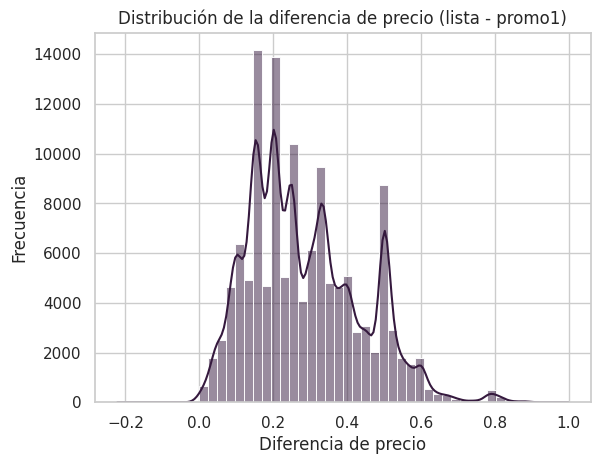

,diferencia_precio
count,130134.000000
mean,0.285290
std,0.151109
min,-0.221834
25%,0.166722
50%,0.250313
75%,0.384911
max,0.998741


In [ ]:
sns.histplot(producto["diferencia_precio"], bins=50, kde=True)
plt.title("Distribución de la diferencia de precio (lista - promo1)")
plt.xlabel("Diferencia de precio")
plt.ylabel("Frecuencia")
plt.show()

producto["diferencia_precio"].describe()


La diferencia porcentual entre precios reales y promocionales vemos que se distribuye con una normal. Esto explicaria lo siguiente:


*   La mayoría de los productos tienen un descuento típico cercano a la media (por ejemplo, -20%)
*   Hay pocos productos con descuentos muy altos o muy bajos
*   El comportamiento de los descuentos es regular y predecible en general






## Entrenamiento del modelo de Regresión Lineal

In [ ]:

# Variables predictoras simples (pueden mejorarse)
features = ["productos_marca", "productos_unidad_medida_presentacion"]

producto = producto.dropna(subset=features)

# Aplica One-Hot Encoding
X = pd.get_dummies(producto[features], drop_first=True)
y = producto["diferencia_precio"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


## Evaluación del modelo

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 0.08010844792937673
MSE: 0.012863769038792107
R²: 0.44005930392758086


## Interpretación de Resultados del Modelo

Entrenamos un modelo de **regresión lineal** utilizando solo dos variables categóricas:

- `productos_marca`: la marca del producto
- `productos_unidad_medida_presentacion`: la unidad de medida en la que se presenta (litro, gramo, unidad, etc.)

Estas variables fueron transformadas mediante **One-Hot Encoding** y se usaron para predecir el **porcentaje de diferencia entre el precio de lista y el precio promocional** (`diferencia_precio`).

### Métricas obtenidas:

- **MAE (Mean Absolute Error): 0.0801**
  - En promedio, el modelo se equivoca en ~8.01 puntos porcentuales.
  - Es un error bajo y aceptable en contextos reales de descuento de precios.

- **MSE (Mean Squared Error): 0.0129**
  - Penaliza más los errores grandes. También bajo, lo cual sugiere buena estabilidad del modelo.

- **R² (Coeficiente de Determinación): 0.440**
  - El modelo explica el **44% de la variabilidad** en los descuentos aplicados.
  - Este es un resultado **muy sólido** para un modelo lineal con solo dos variables categóricas.

### Conclusión

El modelo es **simple pero potente**. Solo con la marca y la unidad de medida del producto es posible estimar con buena precisión qué tan grande será el descuento aplicado.

Este resultado valida que **las políticas de promoción están fuertemente asociadas a la marca y tipo de presentación** de los productos.

Además, al mantener el modelo lineal, se garantiza **interpretabilidad y bajo costo computacional**, ideal para aplicaciones prácticas o como baseline.
